# Data visualization project
### Davide Rosatelli & Leonardo Petroni 

Our project for the Data visualization course is an analysis on the Characters of the book 'Harry potter'. We retrieved data about these characters from several sources in order to extract interesting insights, and our study is composed by some variables visualization and a social network analysis.\
Our main aims are to come up with a description of the characters' group, and to find out if by observing the network of their relationships one can understand their role in history. The dataset from which we created the network has been structured on the relationships cited only in the first book: 'Harry Potter and the philosopher's stone'; an interesting point in our study is therefore to discover patterns that we know should appear later in the story, but looking at the networks and their measures, can be found in our analysis.

### Dataset preparation

We started by importing the following libraries:
 - pandas and numpy to manipulate the data
 - matplotlib, seaborn and plotly to visualize the features
 - networkx to analyze the network
 - wordcloud and Pil to visualize the world cloud
 - requests, BeatifulSoup and lxml for the web scraping

For our study, we used three different datasets.

The first imported, was downloaded here: https://www.kaggle.com/datasets/gulsahdemiryurek/harry-potter-dataset?select=shortversioncharacters.csv and contains several categorical features regarding 25 of the main characters; this csv will be used mainly for feature visualization, to describe and retrieve information about the group. The feature described in this dataset were also useful to extract insights about the network.

For the network analysis part, we retrieved data from this github folder: https://github.com/efekarakus/potter-network/tree/master/data. The file imported are 'characters.csv' which is a list of 65 Harry Potter characters with their name, description and ID, and 'relations.csv', a list of undirected relations between each character, identified with the same ID, and denoted by type of relation (allies or enemies). We filtered the network dataset with the second one to be sure that each node could be labelad as the name of the characters.

In [28]:
# Importing the libraries
import plotly.express as px
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as grs
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import requests
from bs4 import BeautifulSoup
import lxml
from urllib.request import urlopen
%matplotlib inline

In [29]:
# Dataset for descriptive graphs 
df = pd.read_csv('shortversioncharacters.csv')
df.head()

name species  gender       house dateOfBirth  yearOfBirth  \
0        Harry Potter   human    male  Gryffindor  31-07-1980       1980.0   
1    Hermione Granger   human  female  Gryffindor  19-09-1979       1979.0   
2         Ron Weasley   human    male  Gryffindor  01-03-1980       1980.0   
3        Draco Malfoy   human    male   Slytherin  05-06-1980       1980.0   
4  Minerva McGonagall   human  female  Gryffindor  04-10-1925       1925.0   

     ancestry eyeColour hairColour  \
0  half-blood     green      black   
1  muggleborn     brown      brown   
2  pure-blood      blue        red   
3  pure-blood      grey     blonde   
4         NaN       NaN      black   

                                                wand              patronus  \
0  {'wood': 'holly', 'core': 'phoenix feather', '...                  stag   
1  {'wood': 'vine', 'core': 'dragon heartstring',...                 otter   
2  {'wood': 'willow', 'core': 'unicorn tail-hair'...  Jack Russell terrier   
3  {'wood': 'hawthorn', 'core': 'unicorn tail-hai...                   NaN   
4             {'wood': '', 'core': '', 'length': ''}             tabby cat   

   hogwartsStudent  hogwartsStaff              actor  alive  \
0             True          False   Daniel Radcliffe   True   
1             True          False        Emma Watson   True   
2             True          False       Rupert Grint   True   
3             True          False         Tom Felton   True   
4            False           True  Dame Maggie Smith   True   

                                               image  
0       http://hp-api.herokuapp.com/images/harry.jpg  
1   http://hp-api.herokuapp.com/images/hermione.jpeg  
2         http://hp-api.herokuapp.com/images/ron.jpg  
3       http://hp-api.herokuapp.com/images/draco.jpg  
4  http://hp-api.herokuapp.com/images/mcgonagall.jpg

In [30]:
# Dataset for network
dfg = pd.read_csv('relations.csv')
dfg.head()

source  target type
0       0       1    -
1       0      25    -
2       0      45    -
3       1       0    -
4       1      11    +

In [31]:
# Dataset to assign ID to names in dfg
dfc = pd.read_csv('characters.csv')
dfc.head()

id                    name  \
0   0  Regulus Arcturus Black   
1   1            Sirius Black   
2   2          Lavender Brown   
3   3               Cho Chang   
4   4      Vincent Crabbe Sr.   

                                                 bio  
0  Brother of Sirius. Used to be a Death Eater bu...  
1  Best friend of James Potter and godfather of H...  
2  Killed by a werewolf. She was a gryffindor stu...  
3  Ravenclaw student who dated Cedric Diggory and...  
4  Father of Crabbe and death-eater who escaped A...

In [32]:
# Filtering the network dataset, keeping only the connections among characters that are in the desprition dataset
m1 = dfg.source.isin(dfc.id)
m2 = dfg.target.isin(dfc.id)
dfg = dfg[m1]
dfg = dfg[m2]

In [33]:
# Changing the column type in 0 or 1 values
dfg['type'] = dfg['type'].map({'+': 1, '-': 0})
# Substituting the ID with their respective names in the nodes columns
di = pd.Series(dfc.name.values,index=dfc.id).to_dict()
dfg = dfg.replace({"target":di, "source":di})
dfg

source                  target  type
0    Regulus Arcturus Black            Sirius Black     0
1    Regulus Arcturus Black     Bellatrix Lestrange     0
2    Regulus Arcturus Black          Lord Voldemort     0
3              Sirius Black  Regulus Arcturus Black     0
4              Sirius Black        Albus Dumbledore     1
..                      ...                     ...   ...
508                  Aragog             Ron Weasley     0
509                   Grawp        Hermione Granger     1
510                   Grawp           Rubeus Hagrid     1
511                   Grawp            Harry Potter     1
512                  Aragog             Ron Weasley     1

[513 rows x 3 columns]

#### Reduced network for arc diagram

We produced also another csv, that is the network dataset but smaller, filtered with only the characters that are present also in the first dataset. This graph will be less useful to understand the role of the characters but will have a nicer and simpler visualization.\
We used this csv to produce an Arc diagram in R.

In [34]:
m = dfc.name.isin(df.name)
dfc_small = dfc[m]

In [35]:
#filtering keeping only the connections among characters that are in both datasets
m1 = dfg.source.isin(dfc_small.name)
m2 = dfg.target.isin(dfc_small.name)
dfg_small = dfg[m1]
dfg_small = dfg_small[m2]
dfg_small

C:\Users\dadde\AppData\Local\Temp/ipykernel_16300/1789221834.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



source               target  type
5    Sirius Black     Hermione Granger     1
6    Sirius Black  Bellatrix Lestrange     0
7    Sirius Black          Remus Lupin     1
8    Sirius Black        Lucius Malfoy     0
10   Sirius Black   Minerva McGonagall     1
..            ...                  ...   ...
477   Ron Weasley         Harry Potter     1
478   Ron Weasley       Lord Voldemort     0
479   Ron Weasley        Severus Snape     1
481   Ron Weasley       Arthur Weasley     1
486   Ron Weasley        Ginny Weasley     1

[128 rows x 3 columns]

In [36]:
dfg_small.to_csv('Harry Potter network.csv')

### Word cloud

The first visualization made is a word cloud, generated from the descriptions of the characters. We shaped the cloud as the talking hat from harry potter. We can immediatly notice that most of the words are related to the main characters in the story, which means that these descriptions are based on their relationships with each other.

In [37]:
# Importing the shape of the hat
mask = np.array(Image.open("il_340x270.3233145209_49xg.jpeg"))

text = " ".join(text_all for text_all in dfc.bio)

stopwords=set(STOPWORDS)

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500,mask=mask).generate(text)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Feature visualization

In this section we explore some features of the characters, working on the first csv. The variables are mostly categorical, some of them has some missing values, but for our purpose there isn't a useful statistical way to fill them.

We started by plotting two boxplots of the year of birth of the characters, dividing those who at the end of the story are alive or not.\
We produced then several barplots, to understand how the group of characters is composed under several features. The first grid contains bar plots showing the gender, the species and the ancestry of the characters; the second grid shows the colours of eyes and hair of the characters.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             25 non-null     object 
 1   species          25 non-null     object 
 2   gender           25 non-null     object 
 3   house            22 non-null     object 
 4   dateOfBirth      14 non-null     object 
 5   yearOfBirth      17 non-null     float64
 6   ancestry         20 non-null     object 
 7   eyeColour        21 non-null     object 
 8   hairColour       25 non-null     object 
 9   wand             25 non-null     object 
 10  patronus         13 non-null     object 
 11  hogwartsStudent  25 non-null     bool   
 12  hogwartsStaff    25 non-null     bool   
 13  actor            25 non-null     object 
 14  alive            25 non-null     bool   
 15  image            25 non-null     object 
dtypes: bool(3), float64(1), object(12)
memory usage: 2.7+ KB


In [39]:
# Missing values percentage
MVpercentages = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
MVpercentages.head(8)

patronus       0.48
dateOfBirth    0.44
yearOfBirth    0.32
ancestry       0.20
eyeColour      0.16
house          0.12
name           0.00
species        0.00
dtype: float64

In [40]:
# Boxplots
fig = px.box(df, y="yearOfBirth", points = 'all', color="alive", title='Year of birth boxplots and scatterplots, divided for alive or death characters')
fig.show()

There are mainly three ranges of ages in the network: most of characters are born around 1980 or between 1950 and 1960, while a few of them are born before 1930. Several people in the dataset are dead in the book.

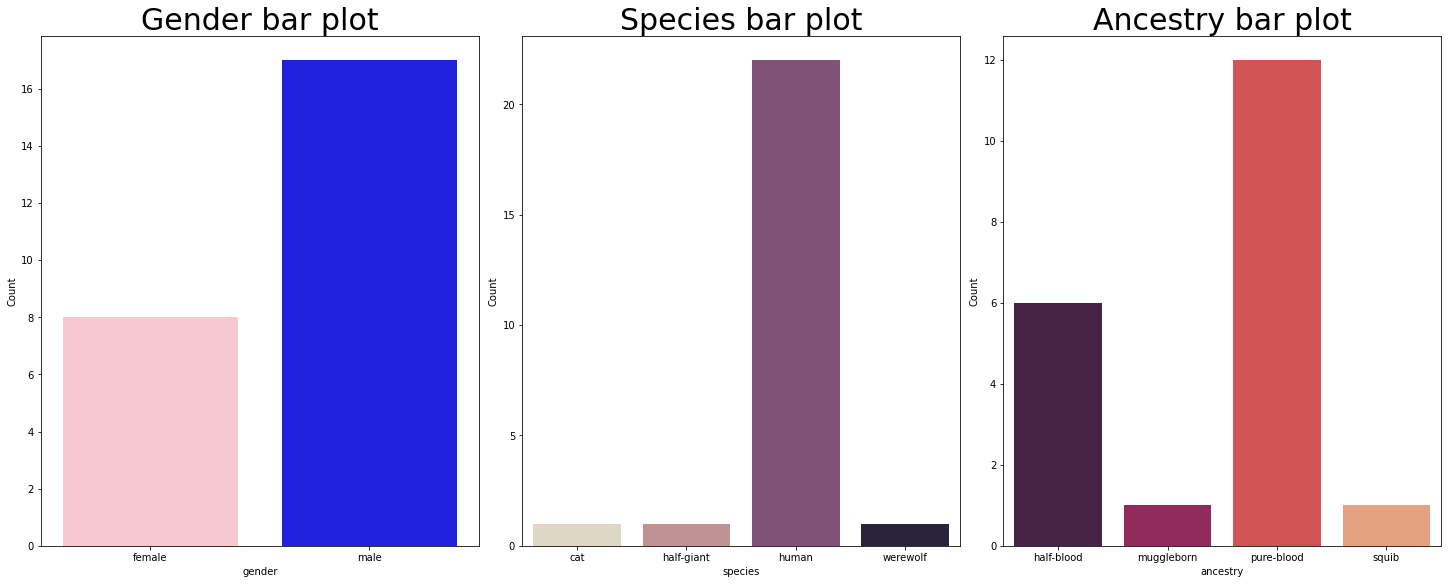

In [41]:
# Bar plots grid
f = plt.figure(figsize=(20,8), layout='constrained') 
grid=grs.GridSpec(1, 3, figure=f)

f_ax1 = f.add_subplot(grid[0:,0])
f_ax1.set_title('Gender bar plot', fontsize=30)
df_plt1 = df.groupby('gender').size().to_frame('Count')
color1 = ['pink', 'blue']
sns.barplot(x = df_plt1.index, y = 'Count', data = df_plt1, palette=color1)

f_ax2 = f.add_subplot(grid[0:,1])
f_ax2.set_title('Species bar plot', fontsize=30)
df_plt2 = df.groupby('species').size().to_frame('Count')
sns.barplot(x = df_plt2.index, y = 'Count', data = df_plt2, palette='ch:s=-.2,r=.6')

f_ax3= f.add_subplot(grid[0:,2])
f_ax3.set_title('Ancestry bar plot', fontsize=30)
df_plt3 = df.groupby('ancestry').size().to_frame('Count')
sns.barplot(x = df_plt3.index, y = 'Count', data = df_plt3, palette='rocket')

plt.show(grid)

In our dataset there are more male charcters than females; most of them are human, except for three particoular species to which belong only one instance. Most of wizards in the group are pure-blood.

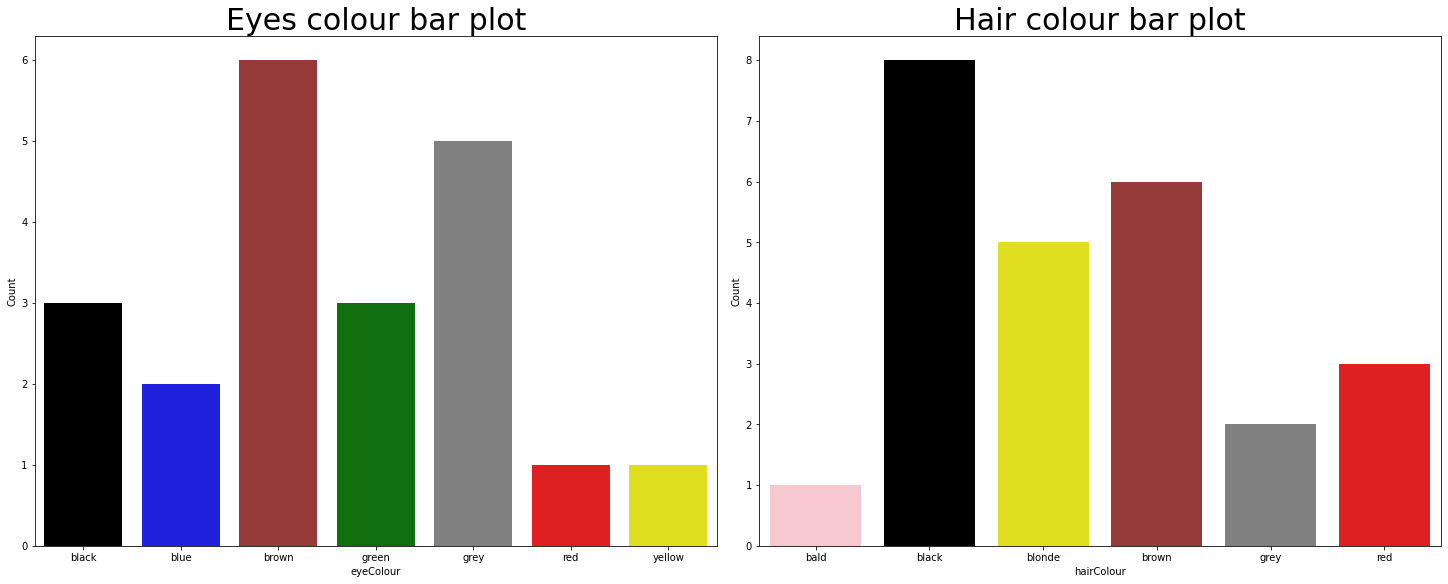

In [42]:
# Bar plots grid
f = plt.figure(figsize=(20,8), layout='constrained') 
grid=grs.GridSpec(1, 2, figure=f)

f_ax1 = f.add_subplot(grid[0:,0])
f_ax1.set_title('Eyes colour bar plot', fontsize=30)
df_plt1 = df.groupby('eyeColour').size().to_frame('Count')
color1 = ['black', 'blue', 'brown', 'green', 'grey', 'red', 'yellow'] 
sns.barplot(x = df_plt1.index, y = 'Count', data = df_plt1, palette=color1)


f_ax2= f.add_subplot(grid[0:,1])
f_ax2.set_title('Hair colour bar plot', fontsize=30)
df_plt2 = df.groupby('hairColour').size().to_frame('Count')
color2 = ['pink', 'black', 'yellow', 'brown', 'grey', 'red']
sns.barplot(x = df_plt2.index, y = 'Count', data = df_plt2, palette=color2)

plt.show(grid)

### Network analysis

In this section we created and analysed the network produced by our dataset.

At first we looked at the degree of the nodes, showing them in an histogram.
The network is undirected, connected, has a diameter of 4, an average shortest path lenght of 2.03, an average degree of 10.25 and an average clustering coefficient of 0.61.\
We can state that our network follows a power law distribution, with few high degree nodes, many low degree degree nodes, and a small diameter compared to the number of nodes.

We computed then the main centrality measures of the nodes, namely degree centrality, betwennes centrality, closeness centrality, eigenvector centrality and clustering coefficient. Through a function we printed the top ten nodes for each of these measures.

In [43]:
# Creating graph object
G=nx.from_pandas_edgelist(dfg,source='source',target='target')

In [44]:
# Histogram of degree distribution
def degree_hist(net, kind = None, group = False):
    if kind == 'in':  degrees = net.in_degree()
    elif kind == 'out':  degrees = net.out_degree()
    else: degrees = net.degree()
   
    df = pd.DataFrame(degrees, columns = ['Node', 'Degree'])
    nbins = None if group else len(degrees)
    fig = px.histogram(df, x="Degree", nbins = nbins, title='Degree distribution' )
    fig.update_layout(yaxis_title="# of Nodes", bargap=0.01)
    return fig 

degree_hist(G)

In [45]:
# Checking connection
nx.is_connected(G)

True

In [46]:
# Diameter
nx.diameter(G)

4

In [47]:
# Average shortest path
nx.average_shortest_path_length(G)

2.0283653846153844

In [48]:
# Average degree
sum(dict(G.degree()).values()) / nx.number_of_nodes(G)

10.246153846153845

In [49]:
# Average clustering coefficient
nx.average_clustering(G)

0.6116923748817632

In [50]:
# Given a dictionary and a threshold parameter K, the top K keys are returned according to the element values.
def get_top_keys(df, column, top):
    return df.sort_values(column, ascending = False).head(top)['Node'].tolist()

In [51]:
# Degree centrality
deg = nx.degree_centrality(G)
deg_df = pd.DataFrame(deg.items(), columns = ['Node', 'Degree'])

# Betweenness centrality
centr = nx.betweenness_centrality(G)
centr_df = pd.DataFrame(centr.items(), columns = ['Node', 'Betweeness'])

# Closeness centrality
clos = nx.closeness_centrality(G)
clos_df = pd.DataFrame(clos.items(), columns = ['Node', 'Closeness'])

# Eigenvector centrality
egs = nx.eigenvector_centrality(G)
egs_df = pd.DataFrame(egs.items(), columns = ['Node', 'Eigenvector'])

# Clustering coefficient
clu = nx.clustering(G)
clu_df = pd.DataFrame(clu.items(), columns = ['Node', 'Clustering'])

print('Top 10 by Degree centrality', get_top_keys(deg_df, 'Degree', 10))
print('Top 10 by Betweeness centrality', get_top_keys(centr_df, 'Betweeness', 10))
print('Top 10 by Closeness centrality', get_top_keys(clos_df, 'Closeness', 10))
print('Top 10 by Eigenvector centrality', get_top_keys(egs_df, 'Eigenvector', 10))
print('Top 10 by Clustering coefficient', get_top_keys(clu_df, 'Clustering', 10))

Top 10 by Degree centrality ['Harry Potter', 'Ron Weasley', 'Lord Voldemort', 'Hermione Granger', 'Albus Dumbledore', 'Sirius Black', 'Ginny Weasley', 'George Weasley', 'Fred Weasley', 'Molly Weasley']
Top 10 by Betweeness centrality ['Harry Potter', 'Lord Voldemort', 'Albus Dumbledore', 'Ron Weasley', 'Hermione Granger', 'Neville Longbottom', 'Luna Lovegood', 'Sirius Black', 'Rubeus Hagrid', 'Bellatrix Lestrange']
Top 10 by Closeness centrality ['Harry Potter', 'Ron Weasley', 'Hermione Granger', 'Lord Voldemort', 'Albus Dumbledore', 'Sirius Black', 'Ginny Weasley', 'George Weasley', 'Fred Weasley', 'Molly Weasley']
Top 10 by Eigenvector centrality ['Harry Potter', 'Ron Weasley', 'Hermione Granger', 'Albus Dumbledore', 'Lord Voldemort', 'Sirius Black', 'Ginny Weasley', 'George Weasley', 'Fred Weasley', 'Molly Weasley']
Top 10 by Clustering coefficient ['Fluffy', 'Mary Riddle', 'Tom Riddle Sr.', 'Alice Longbottom', 'Grawp', 'Rita Skeeter', 'Lavender Brown', 'Quirinus Quirrell', 'Aragog'

We can notice that among the top nodes for the centrality measures there are a few character appearing lots of time, that are the main characters in the book. The only exception is the clustering coefficient, since it does not indicate the importance of a node in the network but its tendency to be part of a clusters.\
Even a person who have never watched Harry potter could undestand from this analysis that he is the main character, and it has an important relationship with characters like Ron Weasley, Hermione Granger, Albus Dumbledore, Sirius Black and Lord Voldemort.

### Network visualization

The first visualization made is produced with networkx, we displayed the graph in a force layout, coloring the edges in red if they represent a relation between enemies and in blue if between allies.

The second visualization is again produced with networkx, on a random seed, and the nodes have size and colours in red palette adjusted according to their degree.

At the end of this section there is also the reduced version of the network displayed as arc diagram. To produce it we used R, you can find our code is in the project folder. We didn't find a good way to order the nodes using the barycenter heuristic, but we included this layout since it is not too much confused.

In [52]:
# Assignin colors to the type column
colors = []
for el in dfg['type']:
    if el == 1:
        colors.append('b')
    else:
        colors.append('r')

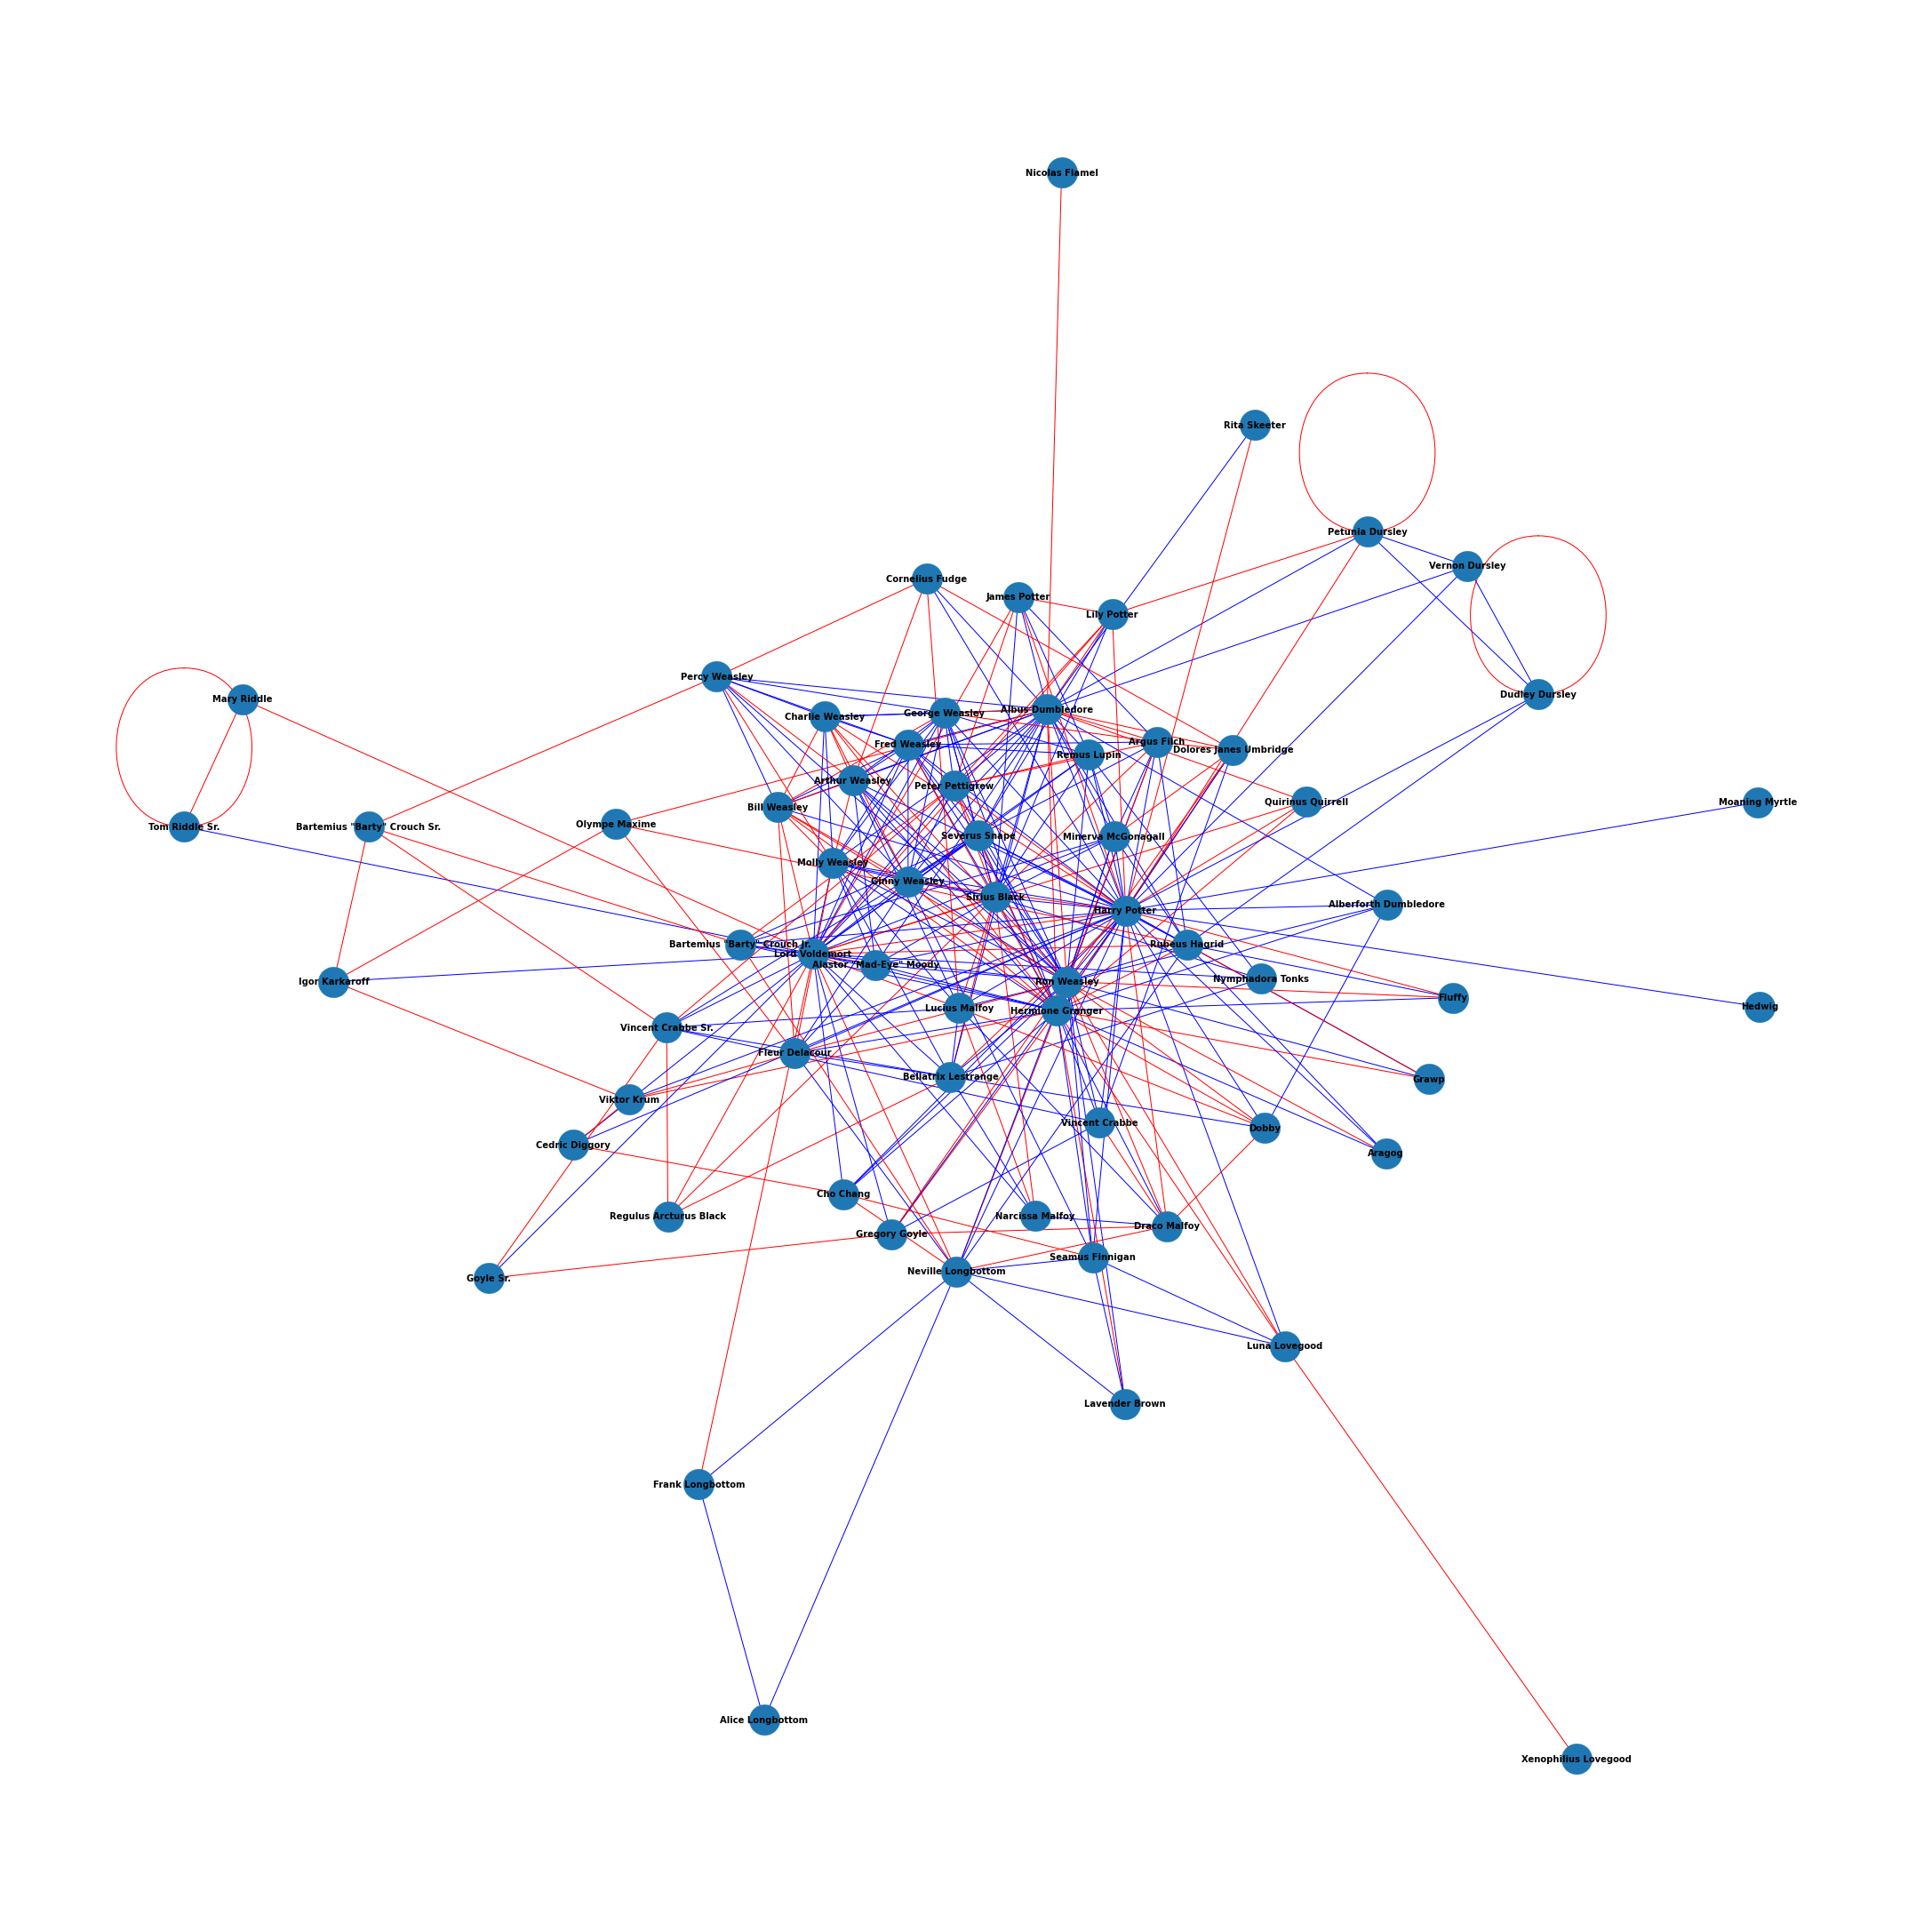

In [53]:
# Drawing the network with coloured edges
plt.figure(figsize=(30,30))
nx.draw(G, pos = nx.spring_layout(G, iterations=200), \
    node_size=1200, edge_color=colors, linewidths=0.25, \
    font_size=10, font_weight='bold', with_labels=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

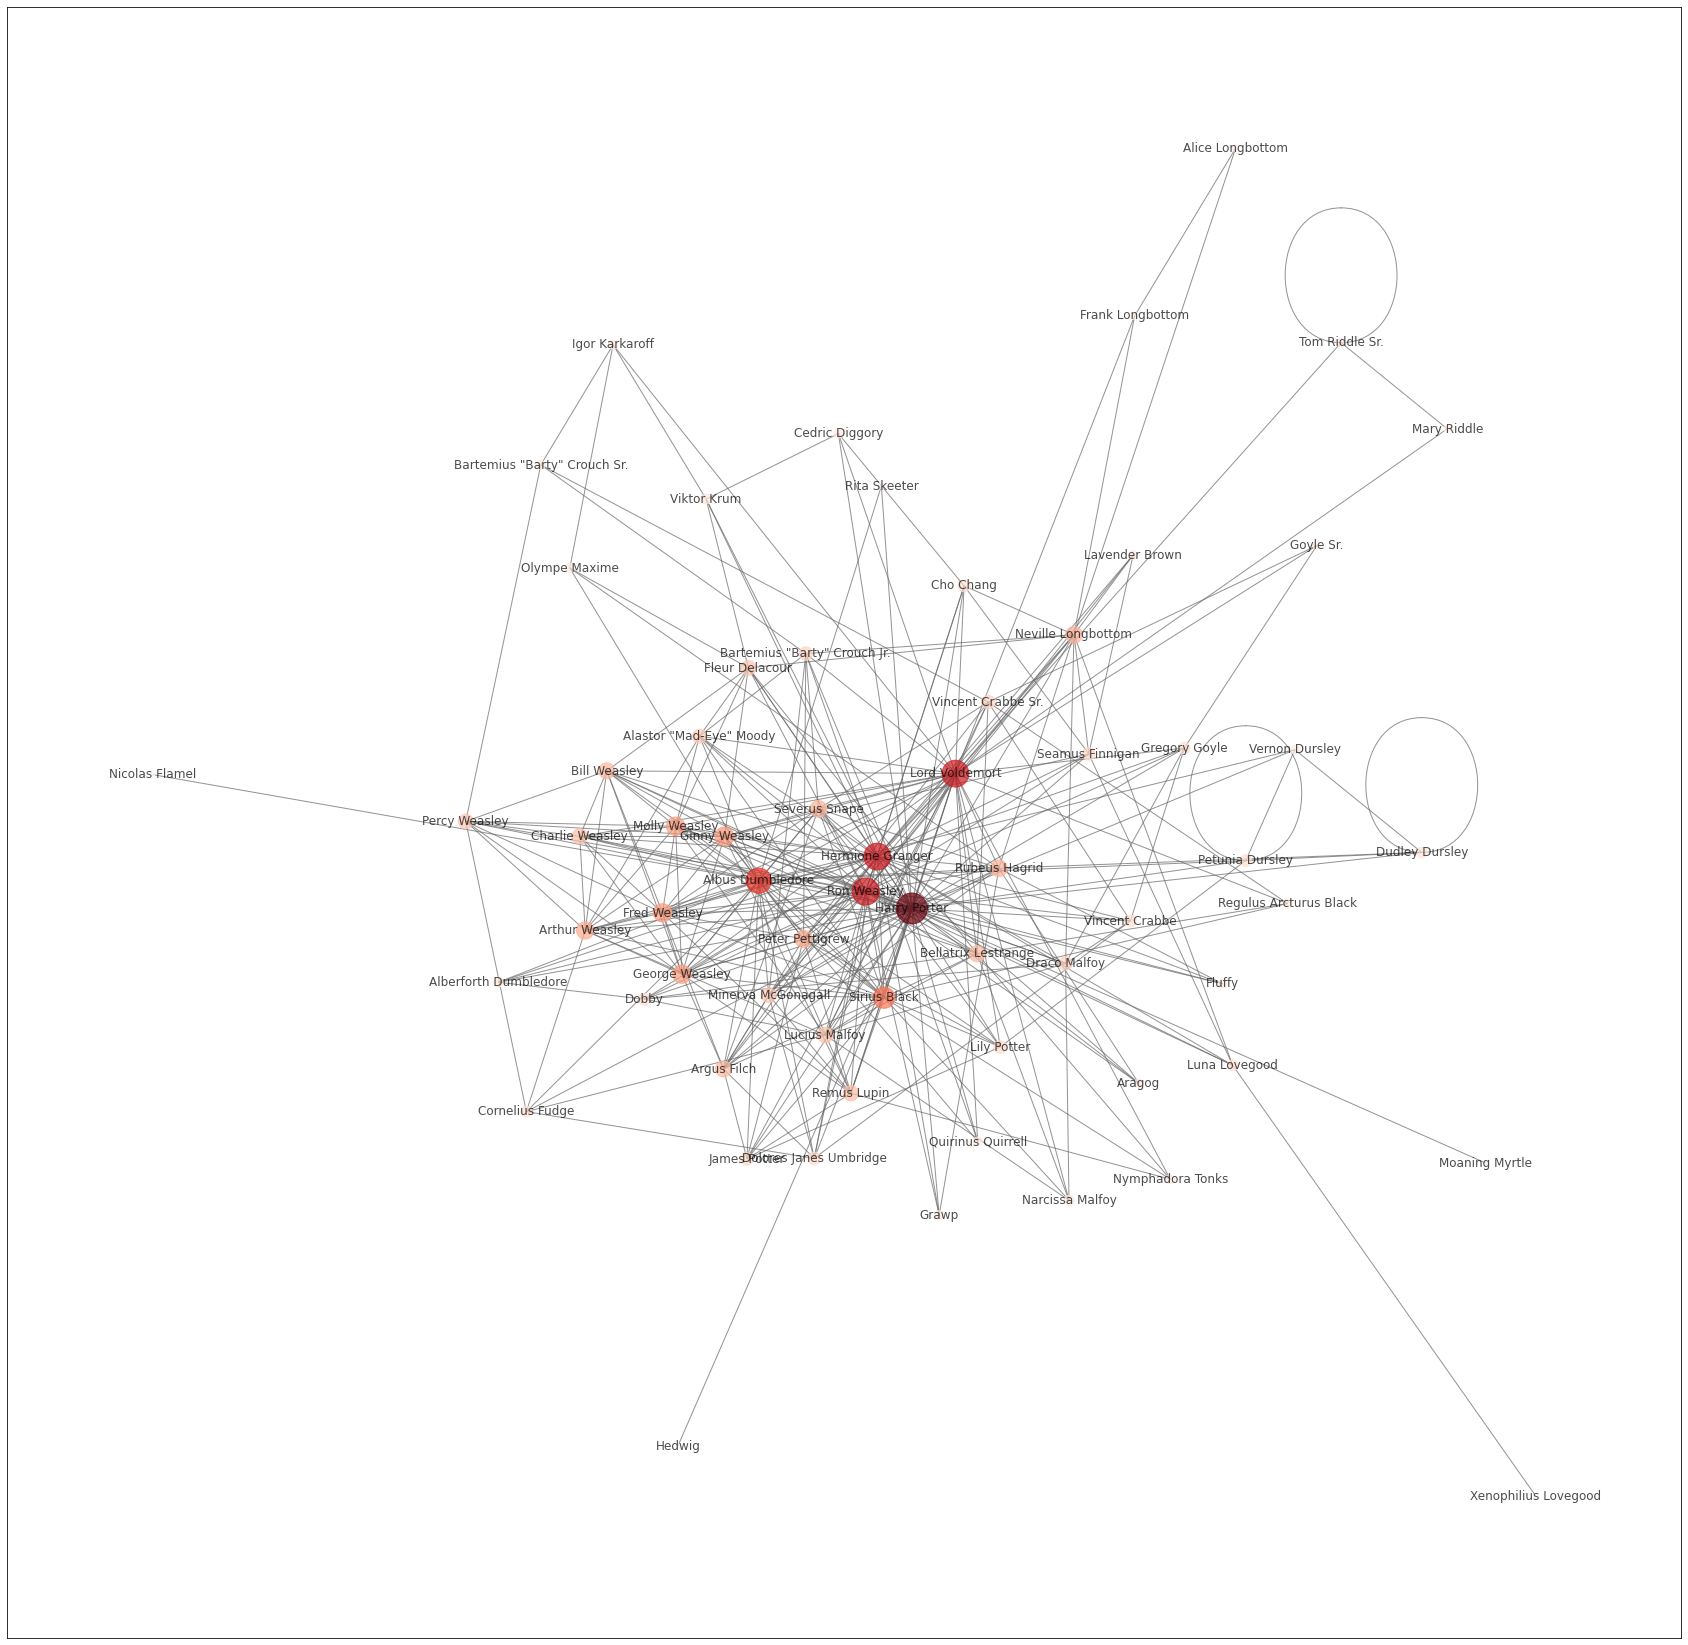

In [55]:
# Plotting the network where the nodes have colour and size adjusted by the degree
np.random.seed(123)

node_color = [G.degree(v) for v in G]

node_size = [20*G.degree(v) for v in G]

plt.figure(figsize=(30,30))
nx.draw_networkx(G, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=True,
                edge_color='0.4', cmap=plt.cm.Reds)
plt.show

Arc diagram of the reduced network
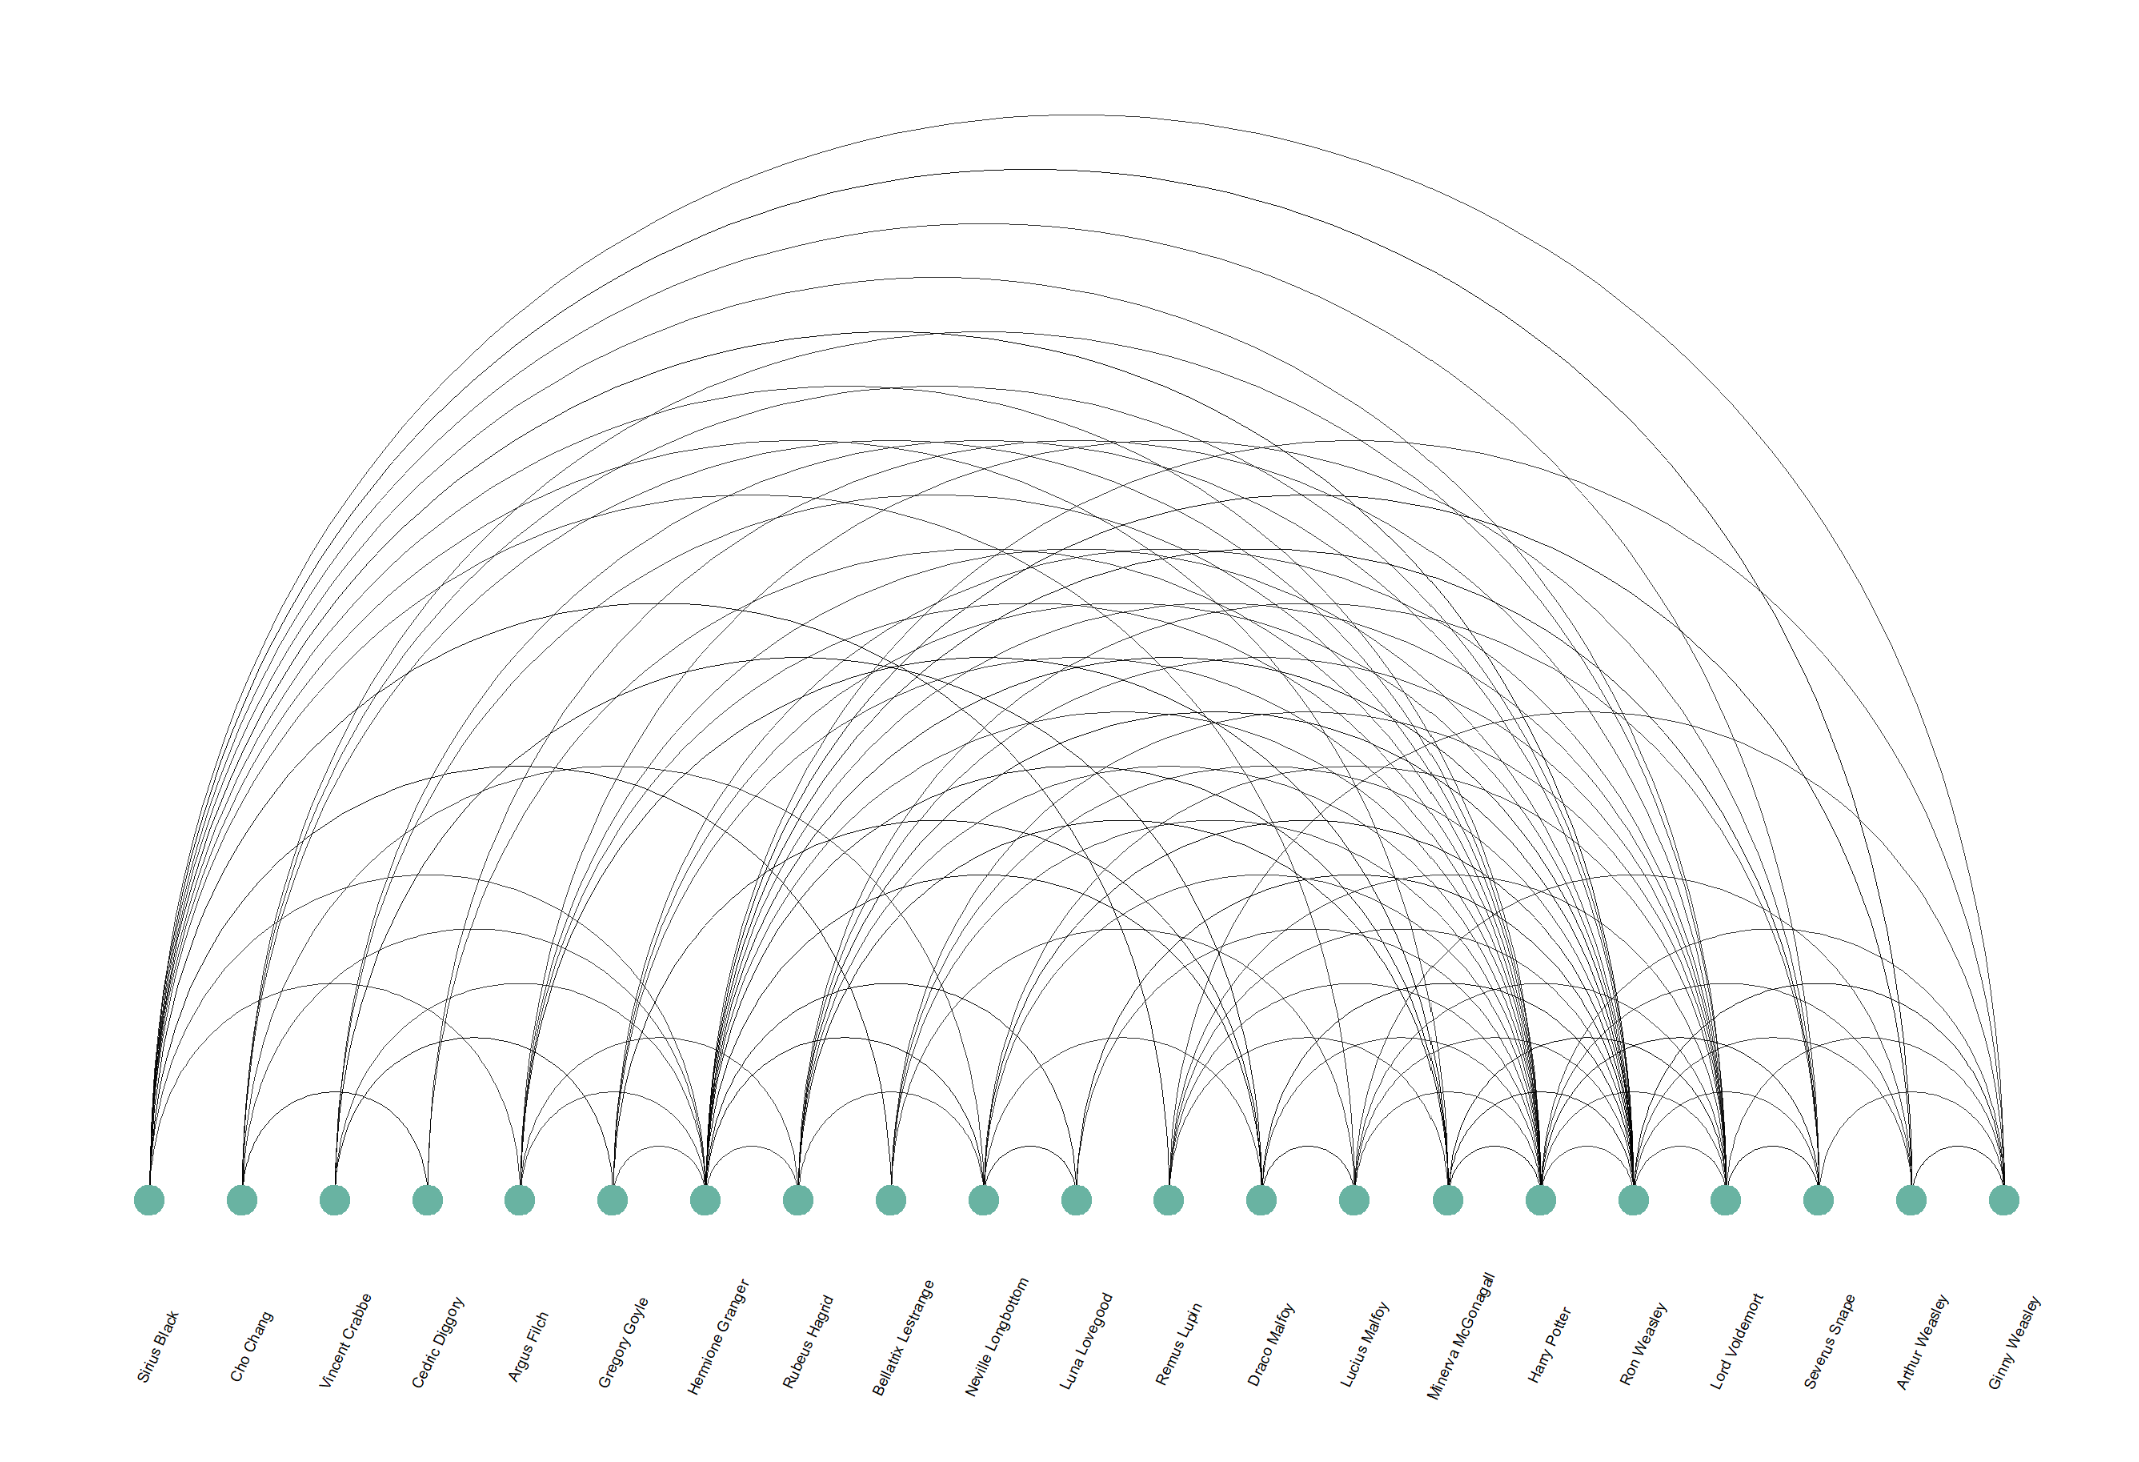

### Network analysis for the two types of relationships

In this section we splitted our network in two: We created a G1 graph contining only the edges between allies and a G2 graph containing only the edges between enemies.
These two network were displayed with networkx on a random seed. For both of them we computed the centrality measures and displayed the top nodes for each. It is very interesting to note that these top nodes for measures are different from the nodes in the full network.\
We decided to export these graphs in Gephi, and to apply a Louvain clusterig to them. Looking at the groups produced and at the most important nodes for measures, we can extract interesting insigths about the characters.

In [56]:
# Creation of the two networks divided by type of relations
dfg1=dfg.query("type == 1")
dfg2=dfg.query("type == 0")
G1=nx.from_pandas_edgelist(dfg1,source='source',target='target')
G2=nx.from_pandas_edgelist(dfg2,source='source',target='target')

#### G1 analysis

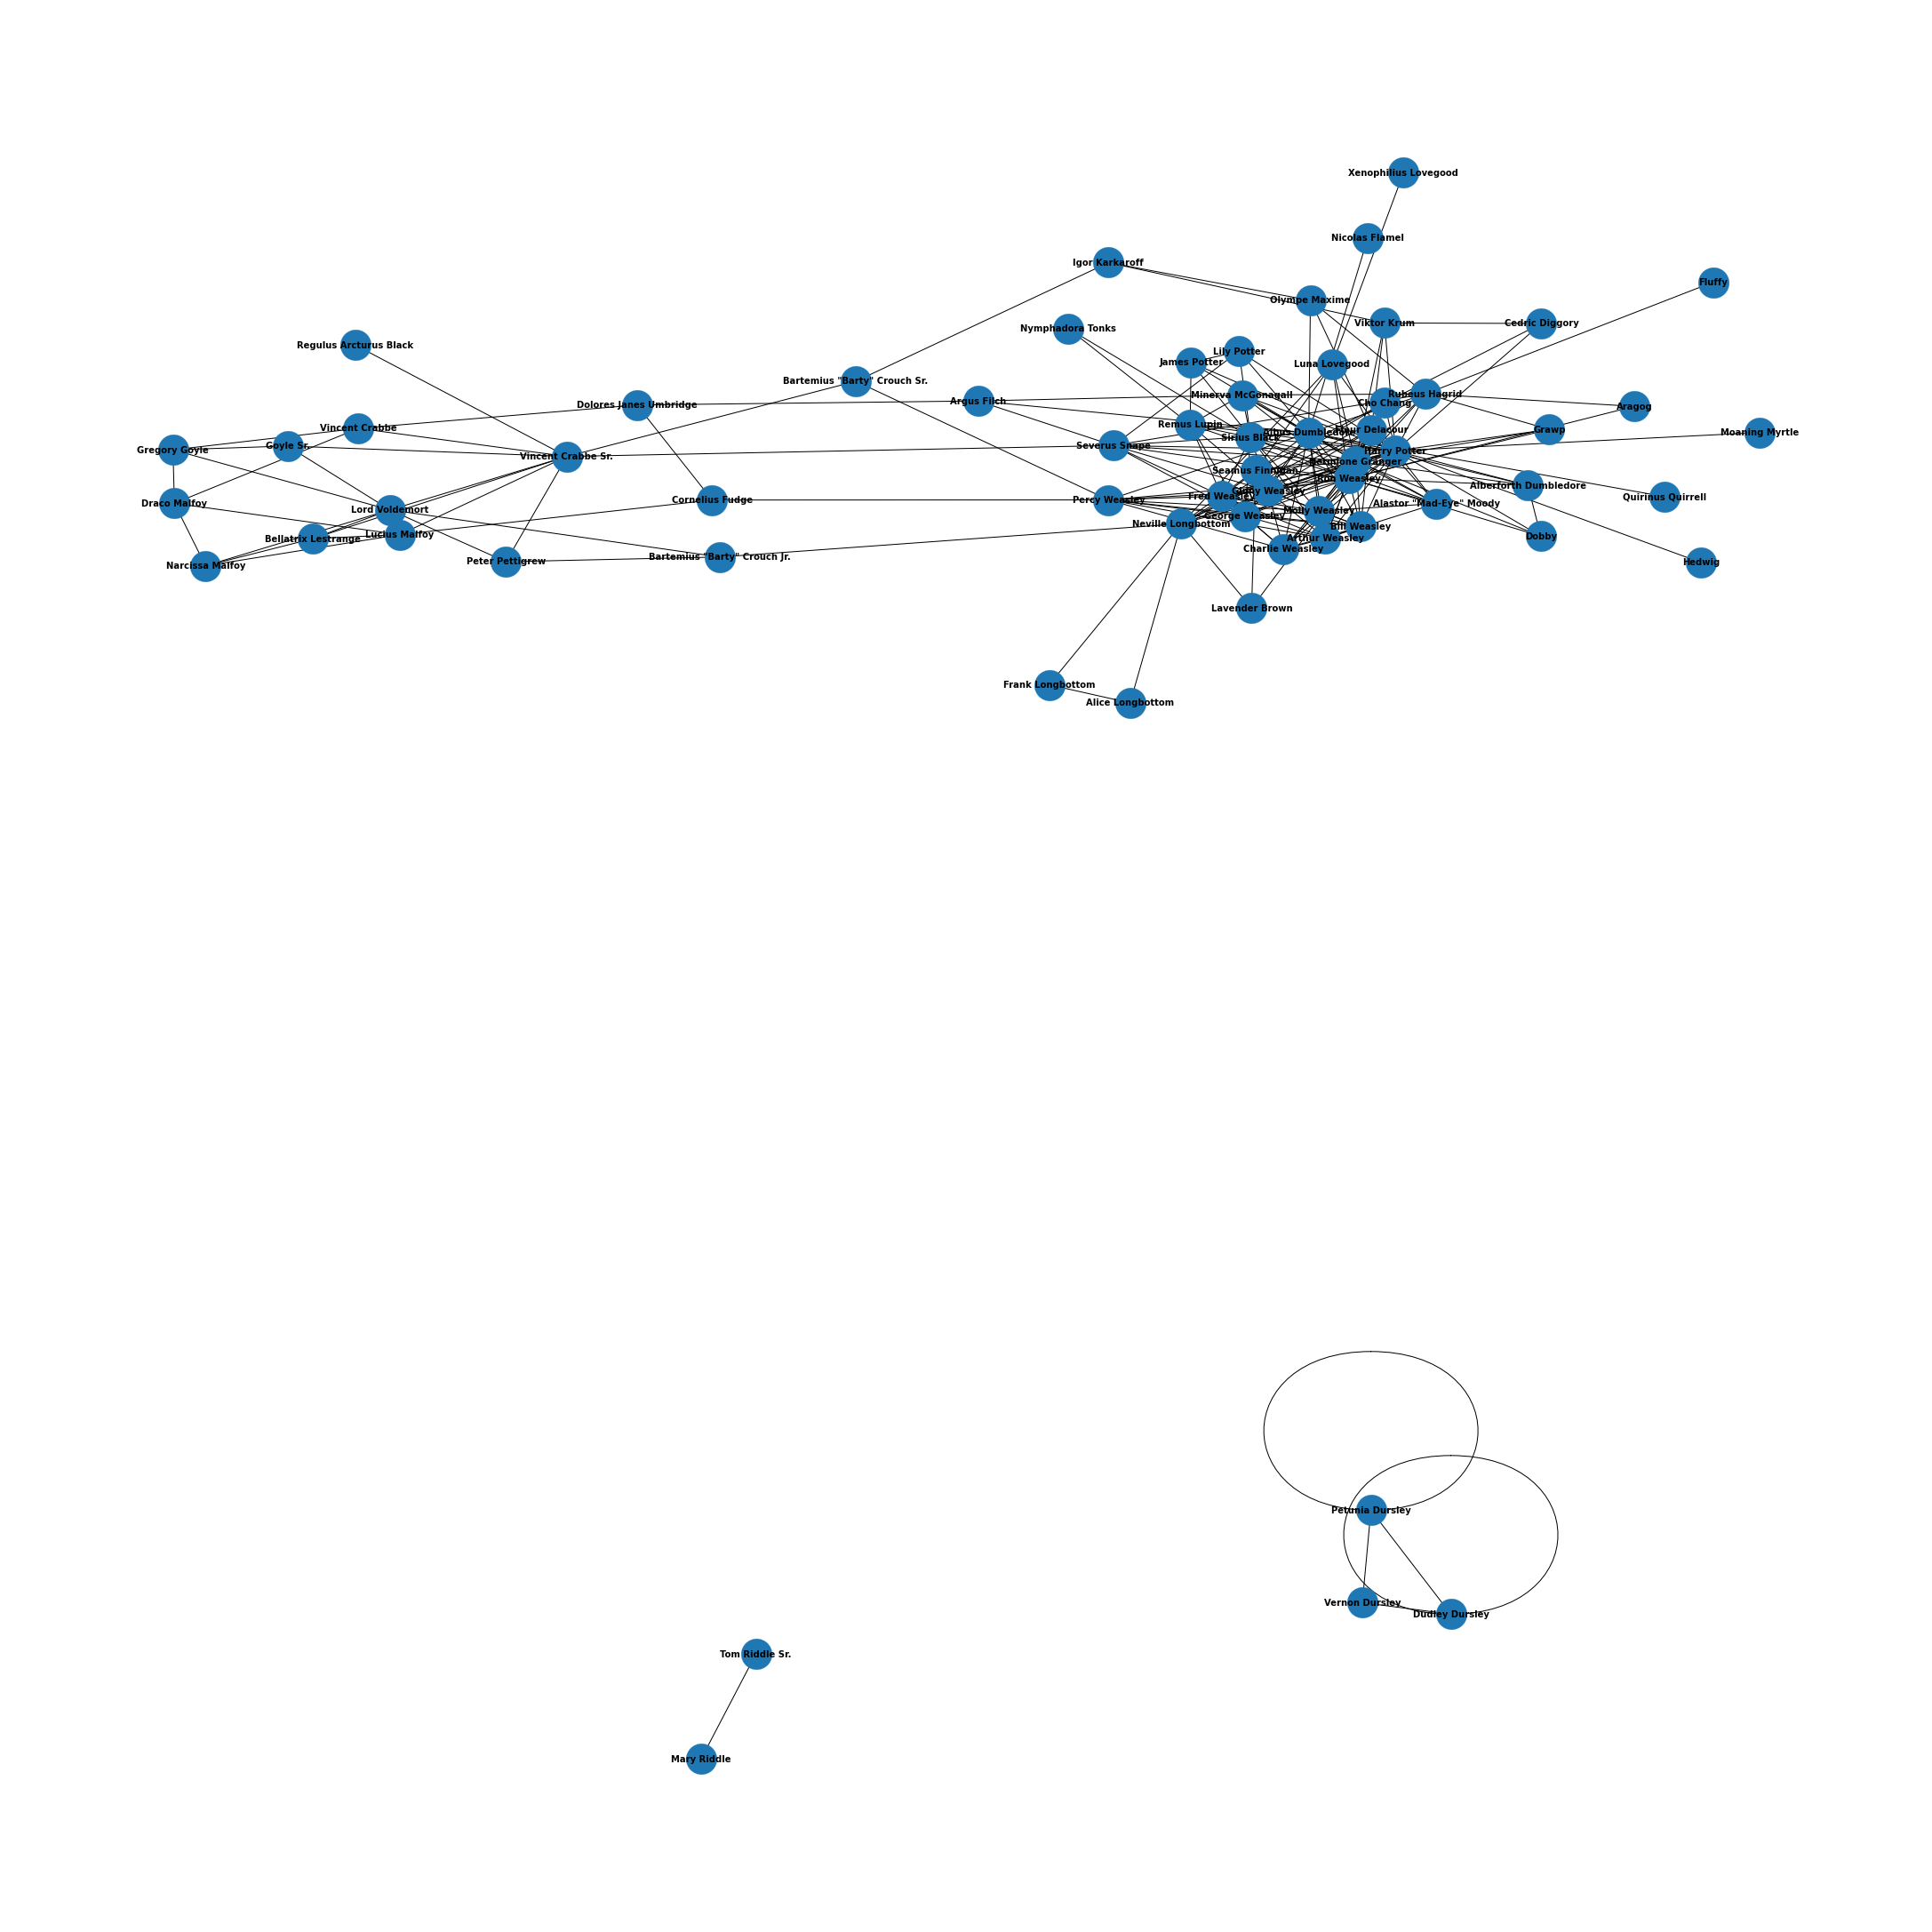

In [57]:
# Allies network visualization
np.random.seed(124)
plt.figure(figsize=(30,30))
nx.draw(G1, node_size=1200, linewidths=0.25, font_size=10, font_weight='bold', with_labels=True)
plt.show()

In [58]:
# Checking connection
nx.is_connected(G1)

False

In [59]:
# Degree centrality
deg = nx.degree_centrality(G1)
deg_df = pd.DataFrame(deg.items(), columns = ['Node', 'Degree'])

# Betweenness centrality
centr = nx.betweenness_centrality(G1)
centr_df = pd.DataFrame(centr.items(), columns = ['Node', 'Betweeness'])

# Closeness centrality
clos = nx.closeness_centrality(G1)
clos_df = pd.DataFrame(clos.items(), columns = ['Node', 'Closeness'])

# Eigenvector centrality
egs = nx.eigenvector_centrality(G1)
egs_df = pd.DataFrame(egs.items(), columns = ['Node', 'Eigenvector'])

# Clustering coefficient
clu = nx.clustering(G1)
clu_df = pd.DataFrame(clu.items(), columns = ['Node', 'Clustering'])

print('Top 10 by Degree centrality', get_top_keys(deg_df, 'Degree', 10))
print('Top 10 by Betweeness centrality', get_top_keys(centr_df, 'Betweeness', 10))
print('Top 10 by Closeness centrality', get_top_keys(clos_df, 'Closeness', 10))
print('Top 10 by Eigenvector centrality', get_top_keys(egs_df, 'Eigenvector', 10))
print('Top 10 by Clustering coefficient', get_top_keys(clu_df, 'Clustering', 10))

Top 10 by Degree centrality ['Harry Potter', 'Ron Weasley', 'Hermione Granger', 'Albus Dumbledore', 'Ginny Weasley', 'Sirius Black', 'Fred Weasley', 'Molly Weasley', 'George Weasley', 'Arthur Weasley']
Top 10 by Betweeness centrality ['Vincent Crabbe Sr.', 'Harry Potter', 'Severus Snape', 'Albus Dumbledore', 'Ron Weasley', 'Neville Longbottom', 'Hermione Granger', 'Percy Weasley', 'Rubeus Hagrid', 'Bartemius "Barty" Crouch Jr.']
Top 10 by Closeness centrality ['Harry Potter', 'Ron Weasley', 'Hermione Granger', 'Albus Dumbledore', 'Severus Snape', 'Ginny Weasley', 'Fred Weasley', 'George Weasley', 'Rubeus Hagrid', 'Neville Longbottom']
Top 10 by Eigenvector centrality ['Harry Potter', 'Ron Weasley', 'Hermione Granger', 'Albus Dumbledore', 'Ginny Weasley', 'Fred Weasley', 'George Weasley', 'Molly Weasley', 'Arthur Weasley', 'Sirius Black']
Top 10 by Clustering coefficient ['Frank Longbottom', 'Grawp', 'Dudley Dursley', 'Vernon Dursley', 'Aragog', 'Petunia Dursley', 'Nymphadora Tonks', 'D

In [60]:
# Exporting G1
nx.write_gexf(G1,'G1.gexf')

G1 clustering on Gephi, with node size proportional to degree
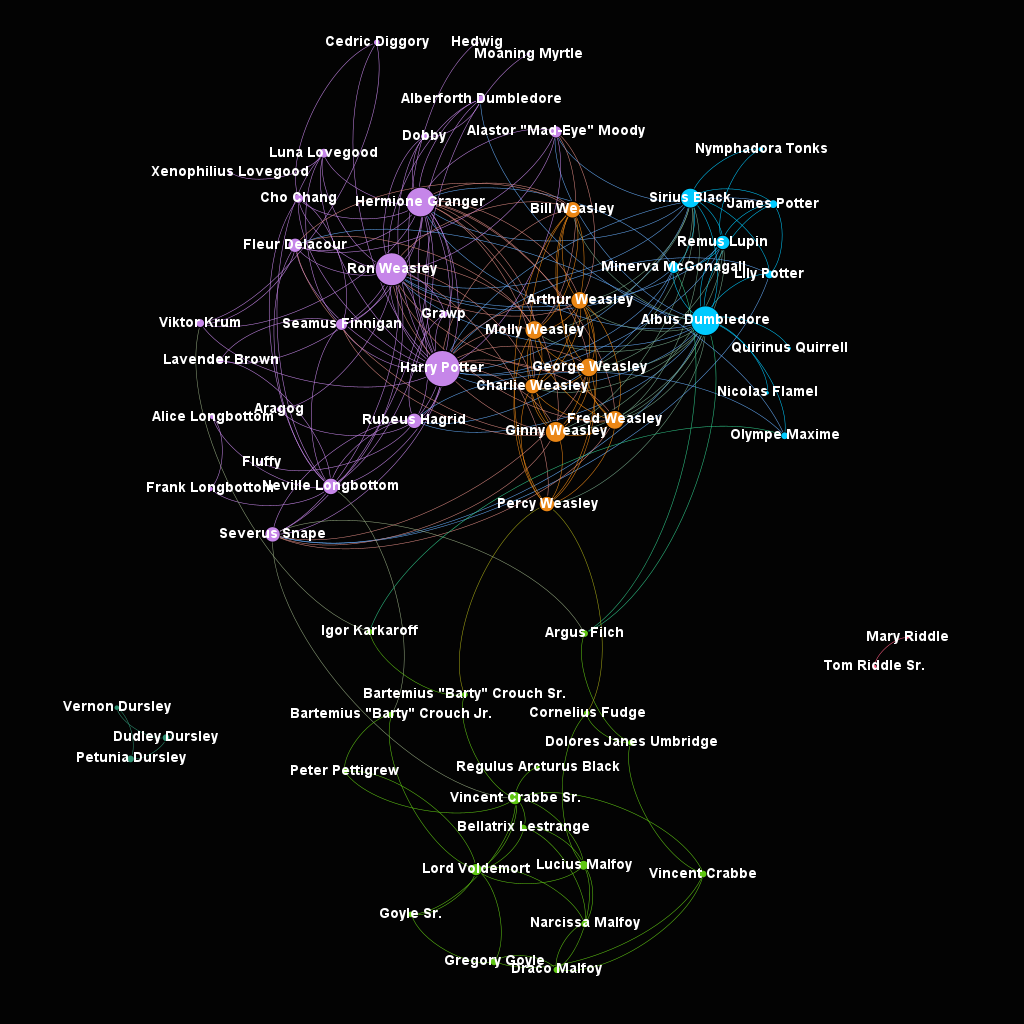

This graph has three components: Two of them are very small, one contains only the Dursley family and the other the Riddle family (Voldemort's parents). The giant component in the middle is clearly composed in two main parts, in this visualization, the characters in the lower part are the enemies, while those in the upper part are the good guys, and between these two sides there are few connections. The clusters have sense, since the orange group contains mostly the Weasley family, and the blue group contains most of the important Hogwarts' students.\
In the centrality measures there are some differences from the complete network, but the patterns is similar. An important change regards the betweenness centrality: nodes with this measure high include characters that connect the two subgroups of bad and good characters in the principal component.  We can notice that in general bad characters have less connection of this type.

#### G2 analysis

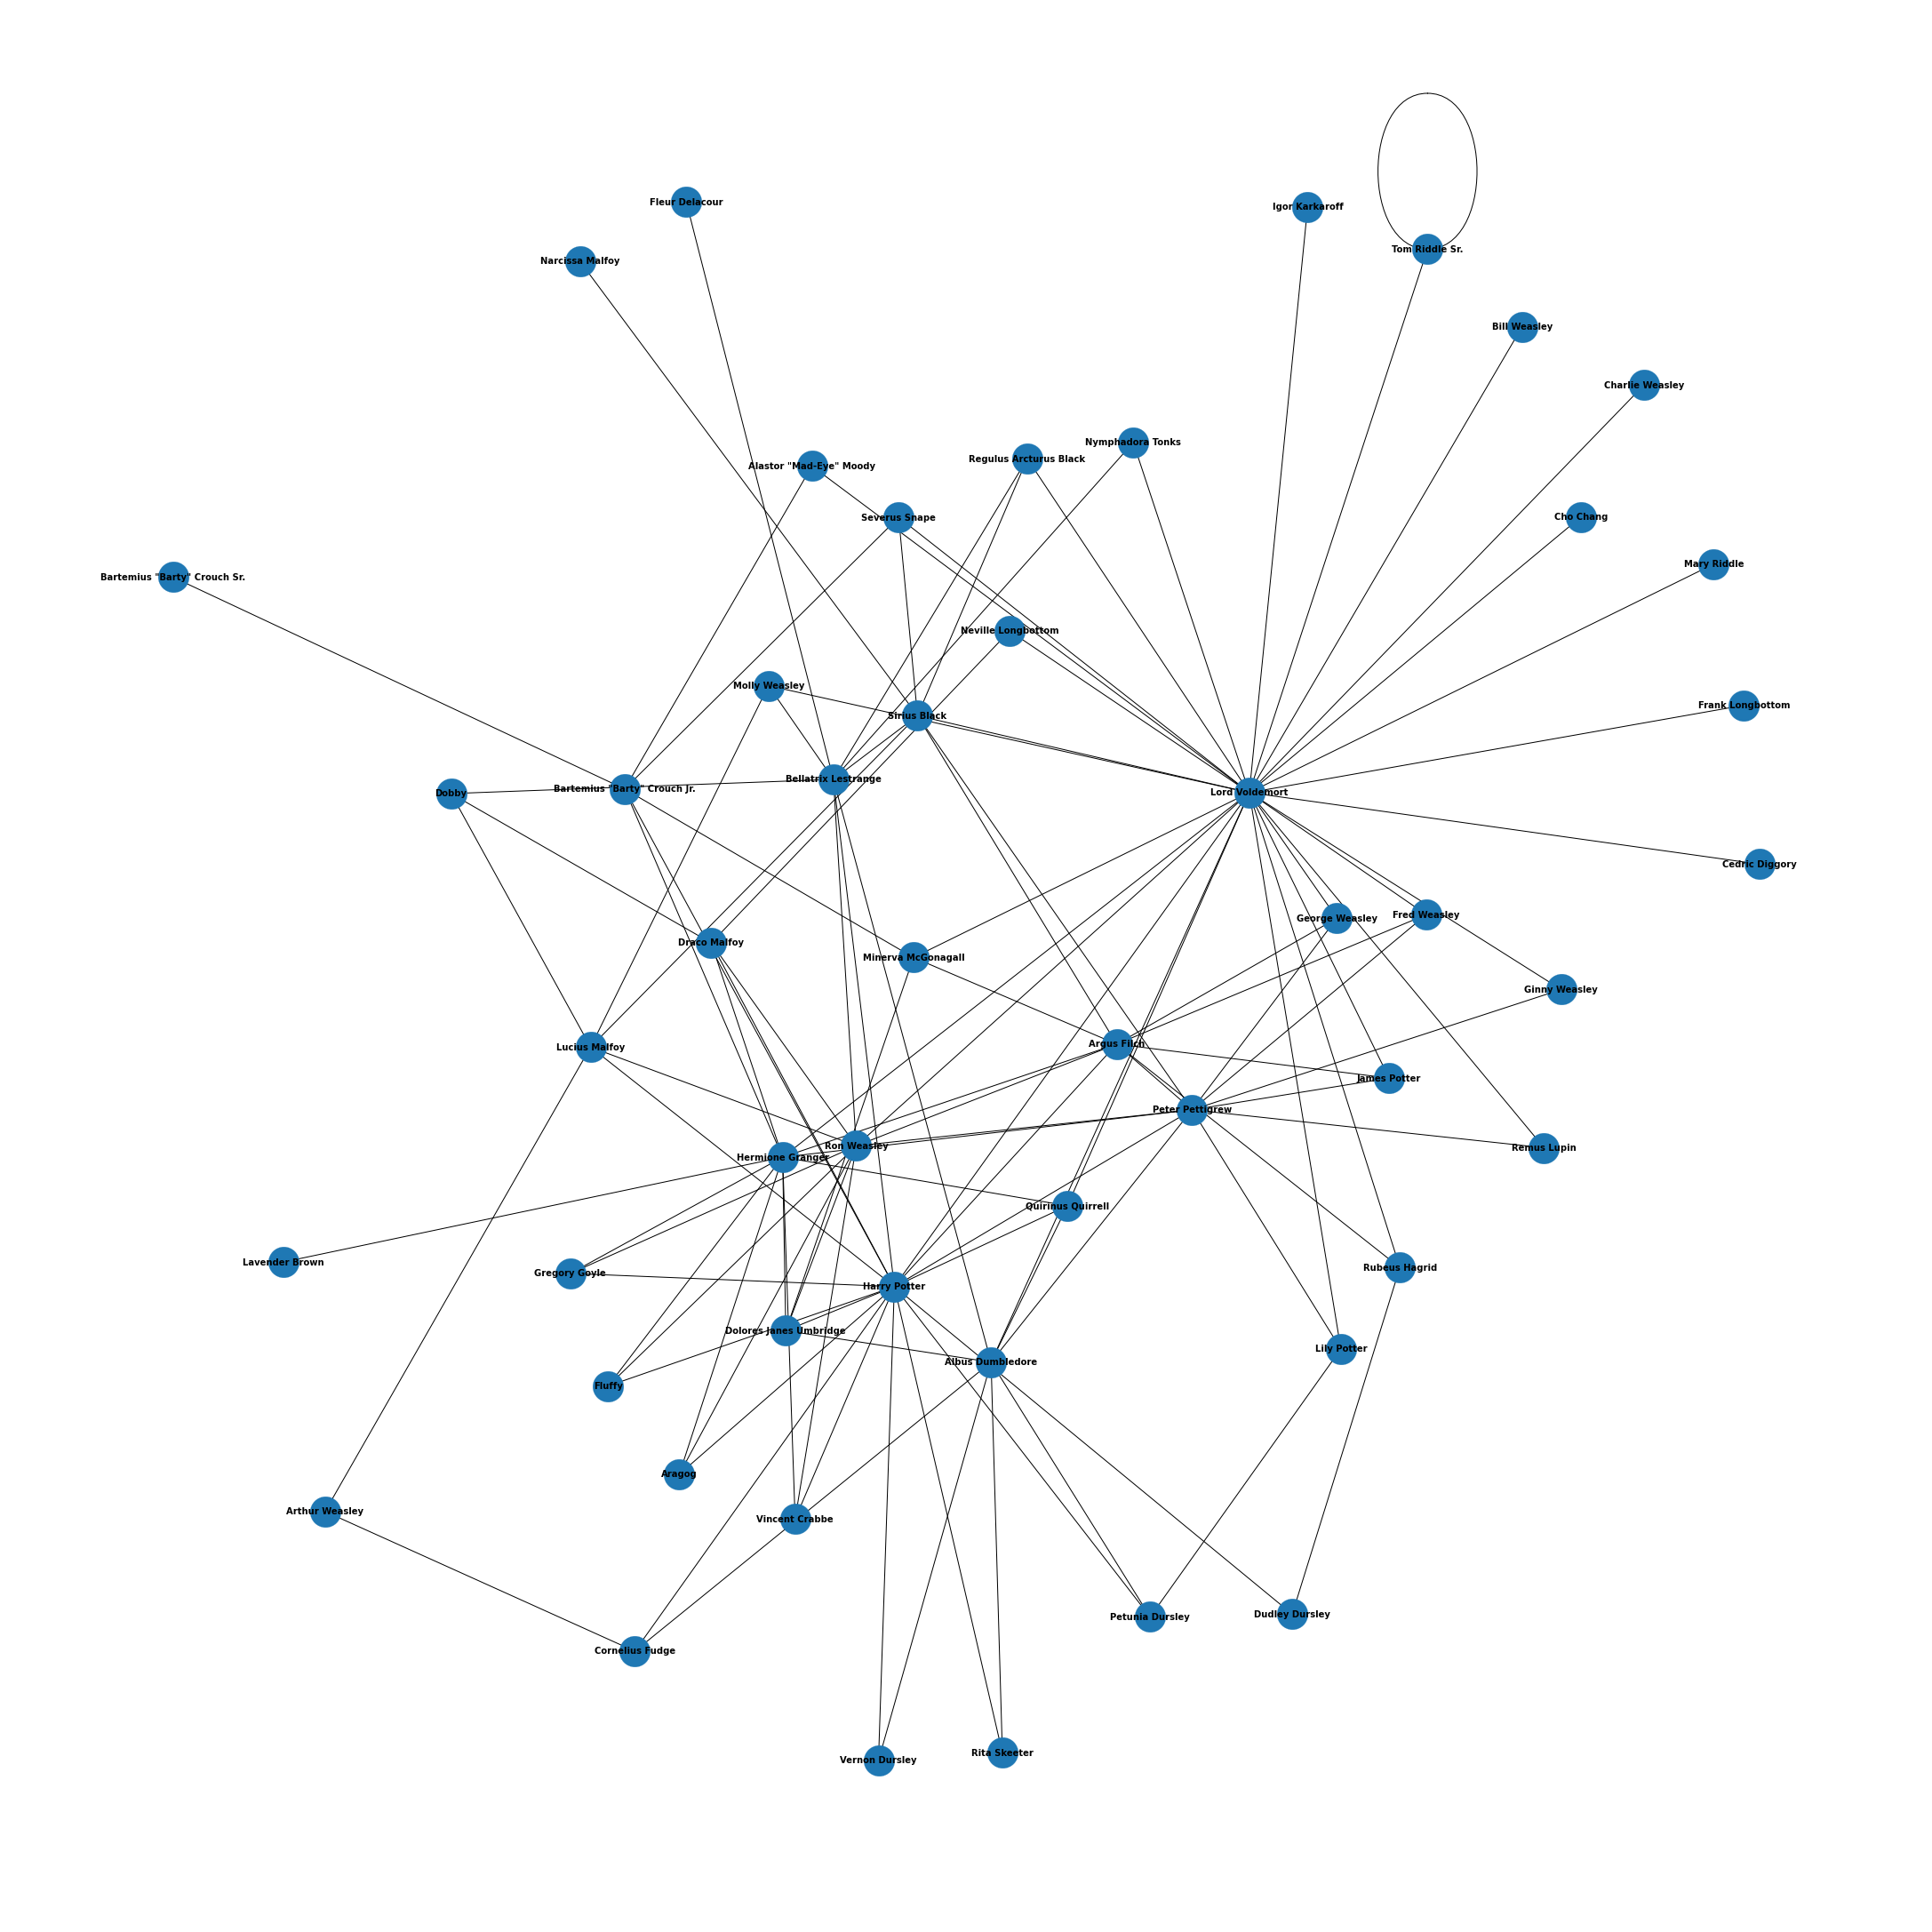

In [61]:
# Enemies network visualization
np.random.seed(123)
plt.figure(figsize=(30,30))
nx.draw(G2, node_size=1200, linewidths=0.25, font_size=10, font_weight='bold', with_labels=True)
plt.show()

In [62]:
# Checking connection
nx.is_connected(G2)

True

In [63]:
# Degree centrality
deg = nx.degree_centrality(G2)
deg_df = pd.DataFrame(deg.items(), columns = ['Node', 'Degree'])

# Betweenness centrality
centr = nx.betweenness_centrality(G2)
centr_df = pd.DataFrame(centr.items(), columns = ['Node', 'Betweeness'])

# Closeness centrality
clos = nx.closeness_centrality(G2)
clos_df = pd.DataFrame(clos.items(), columns = ['Node', 'Closeness'])

# Eigenvector centrality
egs = nx.eigenvector_centrality(G2)
egs_df = pd.DataFrame(egs.items(), columns = ['Node', 'Eigenvector'])

# Clustering coefficient
clu = nx.clustering(G2)
clu_df = pd.DataFrame(clu.items(), columns = ['Node', 'Clustering'])

print('Top 10 by Degree centrality', get_top_keys(deg_df, 'Degree', 10))
print('Top 10 by Betweeness centrality', get_top_keys(centr_df, 'Betweeness', 10))
print('Top 10 by Closeness centrality', get_top_keys(clos_df, 'Closeness', 10))
print('Top 10 by Eigenvector centrality', get_top_keys(egs_df, 'Eigenvector', 10))
print('Top 10 by Clustering coefficient', get_top_keys(clu_df, 'Clustering', 10))

Top 10 by Degree centrality ['Lord Voldemort', 'Harry Potter', 'Hermione Granger', 'Peter Pettigrew', 'Ron Weasley', 'Argus Filch', 'Bellatrix Lestrange', 'Albus Dumbledore', 'Sirius Black', 'Lucius Malfoy']
Top 10 by Betweeness centrality ['Lord Voldemort', 'Harry Potter', 'Hermione Granger', 'Bellatrix Lestrange', 'Ron Weasley', 'Sirius Black', 'Peter Pettigrew', 'Albus Dumbledore', 'Bartemius "Barty" Crouch Jr.', 'Lucius Malfoy']
Top 10 by Closeness centrality ['Lord Voldemort', 'Harry Potter', 'Ron Weasley', 'Hermione Granger', 'Quirinus Quirrell', 'Albus Dumbledore', 'Peter Pettigrew', 'Sirius Black', 'Argus Filch', 'Severus Snape']
Top 10 by Eigenvector centrality ['Lord Voldemort', 'Harry Potter', 'Peter Pettigrew', 'Hermione Granger', 'Ron Weasley', 'Argus Filch', 'Albus Dumbledore', 'Sirius Black', 'Bellatrix Lestrange', 'Quirinus Quirrell']
Top 10 by Clustering coefficient ['Regulus Arcturus Black', 'Quirinus Quirrell', 'Severus Snape', 'James Potter', 'George Weasley', 'Fred

In [64]:
# Exporting G2
nx.write_gexf(G2,'G2.gexf')

G2 clustering on Gephi, with node size proportional to degree
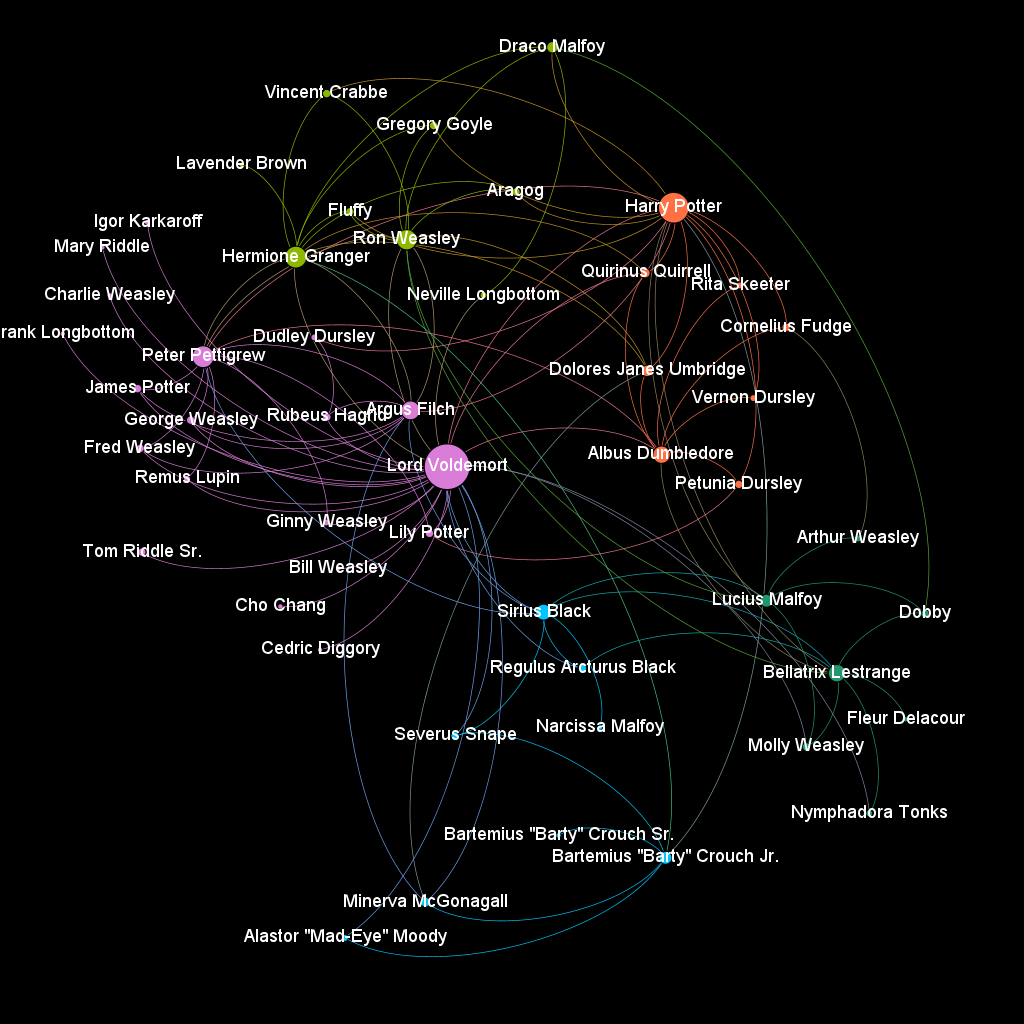

This graph is connected, and seems that the clustering dind't produce so meaningful groups.\
Is important to notice that Lord Voldemort here is first in all the centrality measures, and is therefore clear that he has the highest number of enemies.

### Communities study

In this section we explored our complete network in Gephi, with the aim of finding the groups in which characters are divided.

We decided to apply three different kinds of grouping, the first is a clustering obtained with the Louvain method, computed by Gephi. In this layout we used a standard size for the nodes and displayed them close according to the groups.\
The other two were manually created assigning the characters to some class of a variable, through several data processing steps in order to create the nodes attributes.\
At first we used the variable houses, in the first dataframe, but only few of the nodes in the network could be assigned to one of its categories. We decided so to add another grouping variable, obtained trhough a web scraping on wikipedia, that indicates the affiliation group of the characters, namely Death eater, Dumbledore's army and Order of the Phoenix.\
We also displayed the distribution of the characters among these two categorical variables in two bar plots. These two final Visualization have the same colours for classes, and are displayed with nodes' size proportional to their degree.

#### Louvain clustering

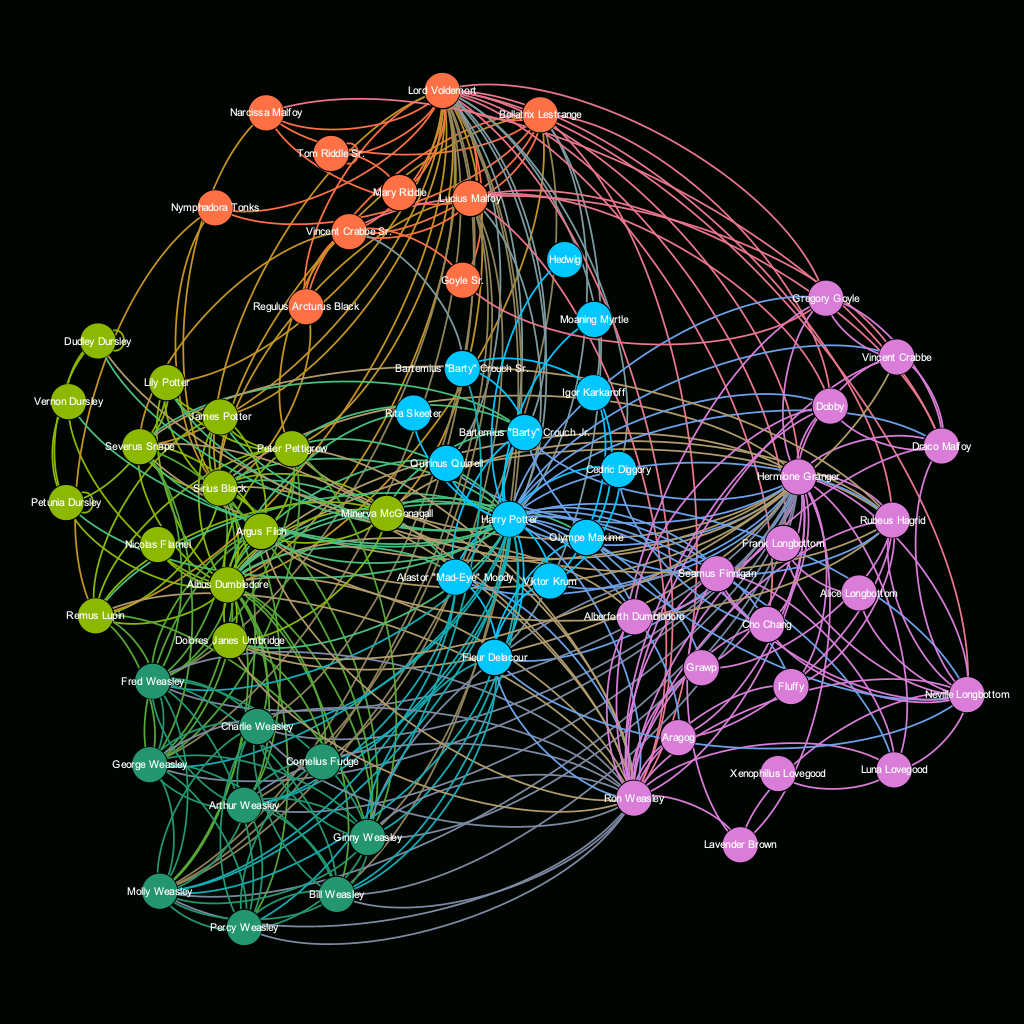

This clustering was performed by Gephi using modularity, and it produced 5 groups.\
We can identify some patterns in them, for instance the Weasly family in the dark green group, the main enemies in the orange group, and most of Hogwarts's student in the purple group.

#### Houses

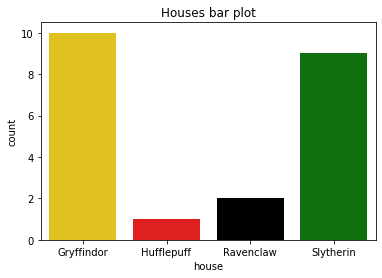

In [65]:
# Houses bar plot
df_plt = df.groupby('house').size().to_frame('count')
color1 = ['gold', 'red', 'black', 'green']
sns.barplot(x = df_plt.index, y = 'count', data = df_plt, palette=color1).set(title='Houses bar plot')
plt.show()

In [66]:
# Kepping only names and house variable
df_ho=df[['name','house']]   

In [67]:
# Function to extract names and divide them in separated lists
def flatten(seq):
    l = []
    for elt in seq:
        t = type(elt)
        if t is tuple or t is list:
            for elt2 in flatten(elt):
                l.append(elt2)
        else:
            l.append(elt)
    return l

In [68]:
# Divind the names in several lists according to the house they belong
nodes = list(G.nodes)
houses = [x['name'].values.tolist() for _,x in df.groupby('house')]
nc = flatten(houses)
NA = list(set(nodes)-set(nc))
houses.append(NA)

In [69]:
# Creating a dictionary, each number correspond to a house, add it as node attribute 
house_dict = {}
house_num = 0
for house in houses:
    for character in house:
        house_dict[character] = house_num
        nx.set_node_attributes(G, house_dict, 'house')
    house_num += 1
    
house_dict

{'Harry Potter': 0,
 'Hermione Granger': 0,
 'Ron Weasley': 0,
 'Minerva McGonagall': 0,
 'Rubeus Hagrid': 0,
 'Neville Longbottom': 0,
 'Ginny Weasley': 0,
 'Sirius Black': 0,
 'Remus Lupin': 0,
 'Arthur Weasley': 0,
 'Cedric Diggory': 1,
 'Cho Chang': 2,
 'Luna Lovegood': 2,
 'Draco Malfoy': 3,
 'Severus Snape': 3,
 'Bellatrix Lestrange': 3,
 'Lord Voldemort': 3,
 'Horace Slughorn': 3,
 'Dolores Umbridge': 3,
 'Lucius Malfoy': 3,
 'Vincent Crabbe': 3,
 'Gregory Goyle': 3,
 'Seamus Finnigan': 4,
 'Mary Riddle': 4,
 'Vincent Crabbe Sr.': 4,
 'Quirinus Quirrell': 4,
 'Narcissa Malfoy': 4,
 'Cornelius Fudge': 4,
 'Fluffy': 4,
 'Charlie Weasley': 4,
 'Albus Dumbledore': 4,
 'Aragog': 4,
 'Frank Longbottom': 4,
 'James Potter': 4,
 'Petunia Dursley': 4,
 'Percy Weasley': 4,
 'Moaning Myrtle': 4,
 'Xenophilius Lovegood': 4,
 'Dudley Dursley': 4,
 'Alice Longbottom': 4,
 'Fleur Delacour': 4,
 'Alberforth Dumbledore': 4,
 'Lily Potter': 4,
 'Rita Skeeter': 4,
 'Vernon Dursley': 4,
 'Dolores J

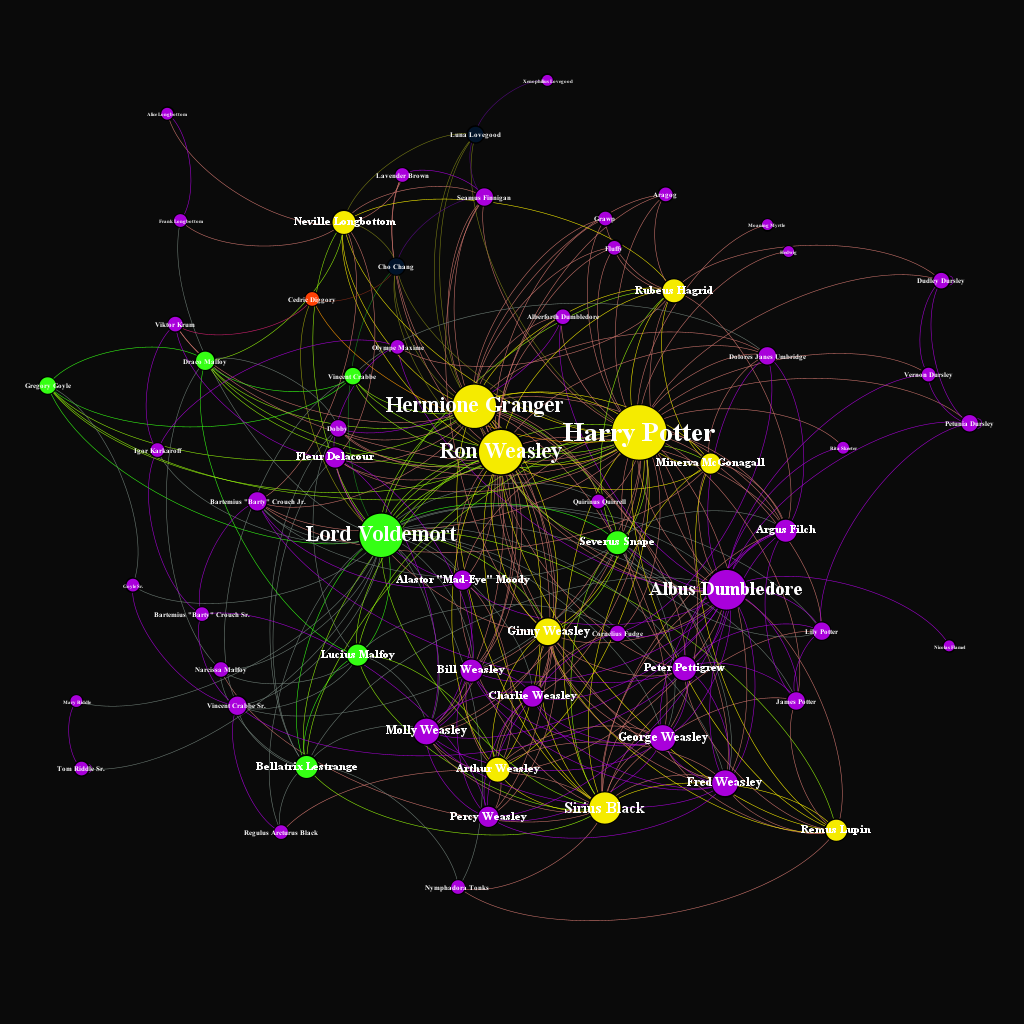

In this network the yellow points are Gryffindor, and most of the main good characters belong to this group, the green points are Slytherin, and several bad characters belog to this house.\
There are only three points in the graph belonging to the other two houses, and as said before most of the characters are not included in this variable, therefore all the purple points has no specified house.

#### Affiliation groups

In [70]:
# Extracting the 'Order of the Phoenix' names from wikipedia
url = "https://en.wikipedia.org/wiki/Order_of_the_Phoenix_(fictional_organisation)"
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")
namelst1=[]
for items in soup.find(class_="wikitable").find_all("tr")[1:]:
    data = items.find("td").get_text(strip=True)
    namelst1.append(data)
    
df1=pd.DataFrame({'name':namelst1})
df1['affiliation']='Order_of_the_Phoenix'
df1.head()

name           affiliation
0      Sirius Black  Order_of_the_Phoenix
1       Edgar Bones  Order_of_the_Phoenix
2  Caradoc Dearborn  Order_of_the_Phoenix
3    Dedalus Diggle  Order_of_the_Phoenix
4      Elphias Doge  Order_of_the_Phoenix

In [71]:
# Extracting the 'Dumbledore's army' names from wikipedia
url = "https://en.wikipedia.org/wiki/Dumbledore%27s_Army"
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")
namelst2=[]
for items in soup.find(class_="wikitable").find_all("tr")[1:]:
    data = items.find("td").get_text(strip=True)
    namelst2.append(data)

df2=pd.DataFrame({'name':namelst2})
df2['affiliation']="Dumbledore's_Army"
df2.head()

name        affiliation
0   Hannah Abbott  Dumbledore's_Army
1      Katie Bell  Dumbledore's_Army
2     Susan Bones  Dumbledore's_Army
3      Terry Boot  Dumbledore's_Army
4  Lavender Brown  Dumbledore's_Army

In [72]:
# Extracting the 'Death eater' names from wikipedia
url = "https://en.wikipedia.org/wiki/Death_Eater"
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")
namelst3=[]
for items in soup.find(class_="wikitable").find_all("tr")[1:]:
    data = items.find("td").get_text(strip=True)
    namelst3.append(data)

df3=pd.DataFrame({'name':namelst3})
df3['affiliation']="Death_Eater"
df3.head()

name  affiliation
0                     Avery  Death_Eater
1             Regulus Black  Death_Eater
2  Alecto and Amycus Carrow  Death_Eater
3                    Crabbe  Death_Eater
4          Barty Crouch Jr.  Death_Eater

In [73]:
# Concatenating the groups
affiliation_df=pd.concat([df1, df2, df3])
affiliation_df

name           affiliation
0       Sirius Black  Order_of_the_Phoenix
1        Edgar Bones  Order_of_the_Phoenix
2   Caradoc Dearborn  Order_of_the_Phoenix
3     Dedalus Diggle  Order_of_the_Phoenix
4       Elphias Doge  Order_of_the_Phoenix
..               ...                   ...
22            Selwyn           Death_Eater
23     Severus Snape           Death_Eater
24           Travers           Death_Eater
25            Wilkes           Death_Eater
26     Corban Yaxley           Death_Eater

[77 rows x 2 columns]

In [74]:
# Adding the affiliation column in the characters dataset
dfc = pd.merge(dfc, affiliation_df, on='name', how='left')
dfc.at[45, 'affiliation'] = 'Death_Eater'
dfc.head()

id                    name  \
0   0  Regulus Arcturus Black   
1   1            Sirius Black   
2   2          Lavender Brown   
3   3               Cho Chang   
4   4      Vincent Crabbe Sr.   

                                                 bio           affiliation  
0  Brother of Sirius. Used to be a Death Eater bu...                   NaN  
1  Best friend of James Potter and godfather of H...  Order_of_the_Phoenix  
2  Killed by a werewolf. She was a gryffindor stu...     Dumbledore's_Army  
3  Ravenclaw student who dated Cedric Diggory and...     Dumbledore's_Army  
4  Father of Crabbe and death-eater who escaped A...                   NaN

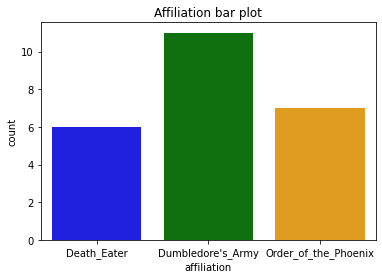

In [75]:
# Affiliation bar plot
df_plt = dfc.groupby('affiliation').size().to_frame('count')
color1 = ['blue', 'green', 'orange']
sns.barplot(x = df_plt.index, y = 'count', data = df_plt, palette=color1).set(title='Affiliation bar plot')
plt.show()

In [76]:
# Keeping only names and affiliation variables
df_aff=dfc[['name','affiliation']]     

In [77]:
# Divind the names in several lists according to the affiliation they belong
nodes = list(G.nodes)
communities = [x['name'].values.tolist() for _,x in dfc.groupby('affiliation')]
nc = flatten(communities)
NA = list(set(nodes)-set(nc))
communities.append(NA)

In [78]:
# # Creating a dictionary, each number correspond to a affiliation, add it as node attribute
community_dict = {}
community_num = 0
for community in communities:
    for character in community:
        community_dict[character] = community_num
        nx.set_node_attributes(G, community_dict, 'community')
    community_num += 1
    
community_dict

{'Igor Karkaroff': 0,
 'Bellatrix Lestrange': 0,
 'Draco Malfoy': 0,
 'Lucius Malfoy': 0,
 'Lord Voldemort': 0,
 'Severus Snape': 2,
 'Lavender Brown': 1,
 'Cho Chang': 1,
 'Seamus Finnigan': 1,
 'Hermione Granger': 1,
 'Neville Longbottom': 1,
 'Luna Lovegood': 1,
 'Harry Potter': 1,
 'Fred Weasley': 1,
 'George Weasley': 1,
 'Ginny Weasley': 1,
 'Ron Weasley': 1,
 'Sirius Black': 2,
 'Albus Dumbledore': 2,
 'Rubeus Hagrid': 2,
 'Remus Lupin': 2,
 'Alastor "Mad-Eye" Moody': 2,
 'Peter Pettigrew': 2,
 'Mary Riddle': 3,
 'Vincent Crabbe Sr.': 3,
 'Quirinus Quirrell': 3,
 'Narcissa Malfoy': 3,
 'Minerva McGonagall': 3,
 'Cornelius Fudge': 3,
 'Fluffy': 3,
 'Charlie Weasley': 3,
 'Aragog': 3,
 'Gregory Goyle': 3,
 'James Potter': 3,
 'Frank Longbottom': 3,
 'Petunia Dursley': 3,
 'Percy Weasley': 3,
 'Moaning Myrtle': 3,
 'Xenophilius Lovegood': 3,
 'Dudley Dursley': 3,
 'Alice Longbottom': 3,
 'Fleur Delacour': 3,
 'Alberforth Dumbledore': 3,
 'Lily Potter': 3,
 'Vincent Crabbe': 3,
 'Ri

In [79]:
# Export the graph in Gephi
nx.write_gexf(G, 'game.gexf')

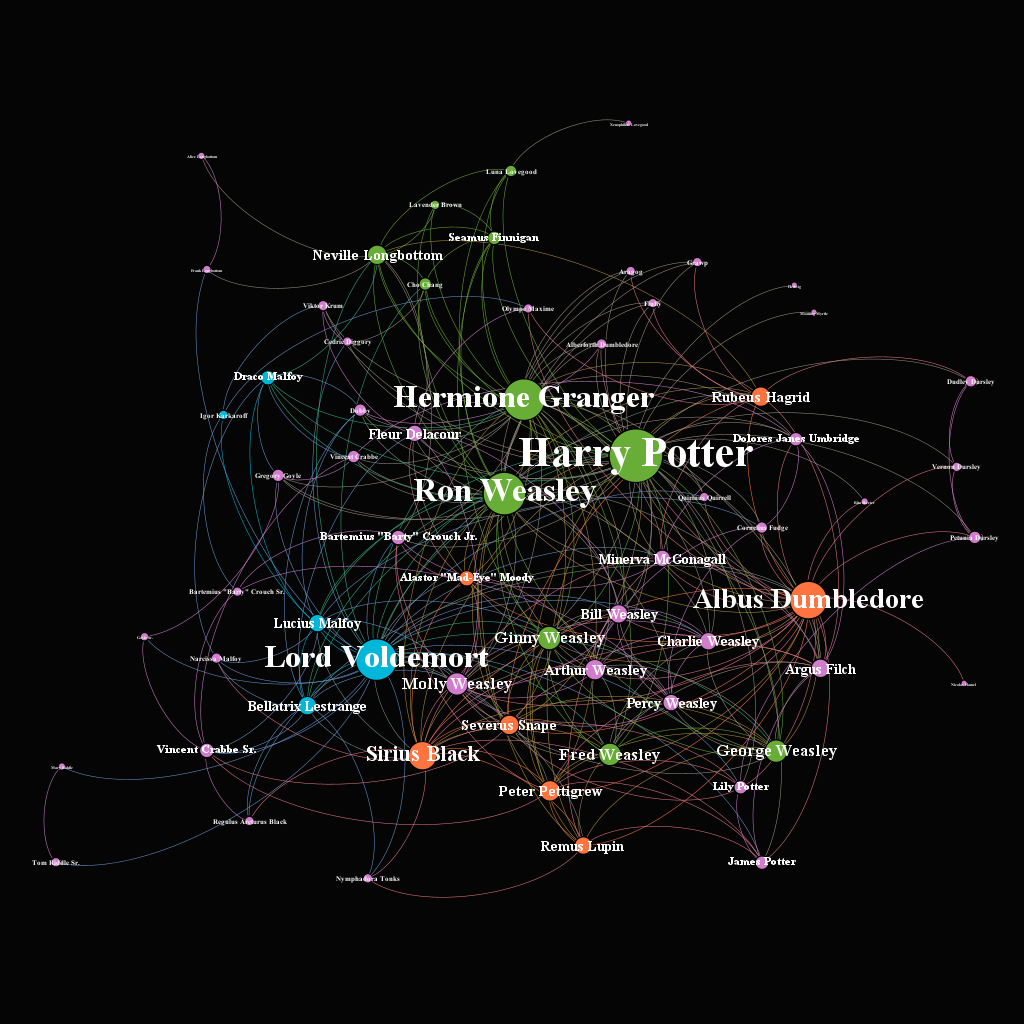

The blue nodes are part of the Death eaters, that is the group of the bad characters. The good characters are divided in the other two affiliations, the orange group is the Order of the Phoenix and the green group is the Dumbledore's army (in the first of this two affiliation thare are older characters while in the second mainly Hogwarts' students).\
In this last study only few characters are not part of any affiliation.